In [1]:
# Install
!pip install neuron==8.2.2
!pip install bmtk==1.0.7

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Download Files

import os

if os.path.basename(os.getcwd())!='LUT_Baseline':
  !git clone https://github.com/ifbanks/LUT_Baseline
  %cd LUT_Baseline/
else:
  print('Mod files have already been downloaded.')
%ls

fatal: destination path 'LUT_Baseline' already exists and is not an empty directory.
/content/LUT_Baseline
biophys_components/  graphs/         plot_results.py   run.sh*
Blad_spikes.csv      images/         plotting.pkl      spikes.csv
build_network.py     jsons/          plotting.py       spikes_pag.csv
error_logs/          network/        __pycache__/      synapses.py
EUS_spikes.csv       notes/          README.md
feedback_loop.py     output/         requirements.txt
generate_input.py    PAG_spikes.csv  run_bionet.py


In [3]:
# Compile Files

import os 
# move to the mechanisms folder
%cd biophys_components/mechanisms/
os.system("rm -rf x86_64") # deletes x86_64 if its there
%ls # just to make sure its gone
print(os.system('nrnivmodl modfiles')) # compile modfiles. Return 0 for success, 1 for failure.
%ls # check to make sure the folder is there now
%cd ../..
%ls

/content/LUT_Baseline/biophys_components/mechanisms
modfiles/
0
modfiles/  x86_64/
/content/LUT_Baseline
biophys_components/  graphs/         plot_results.py   run.sh*
Blad_spikes.csv      images/         plotting.pkl      spikes.csv
build_network.py     jsons/          plotting.py       spikes_pag.csv
error_logs/          network/        __pycache__/      synapses.py
EUS_spikes.csv       notes/          README.md
feedback_loop.py     output/         requirements.txt
generate_input.py    PAG_spikes.csv  run_bionet.py


In [4]:
# Build Network

import numpy as np
from bmtk.builder.networks import NetworkBuilder
import math
import random

random.seed(42)
output_dir='network'

#######################################################################
##################### Create the cells ################################
#######################################################################
print("\nCreating Cells")

# Build the main network
net = NetworkBuilder('LUT')

# Specify number of cells in each population #

numBladaff  = 10
numPAGaff   = 10
numEUSaff   = 10
numIND      = 10
numHypo     = 10
numINmplus  = 10
numINmminus = 10
numPGN      = 10
numFB       = 10
numIMG      = 10 
numMPG      = 10
numEUSmn    = 10
numBladmn   = 10
# Create the nodes ----------------------------------------
net.add_nodes(N=numBladaff, level='high',pop_name='Bladaff',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numPAGaff, pop_name='PAGaff',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numEUSaff, level='high',pop_name='EUSaff',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numIND, pop_name='IND',model_type='biophysical',model_template='hoc:IND',morphology='blank.swc')
net.add_nodes(N=numHypo, pop_name='Hypo',model_type='biophysical',model_template='hoc:HYPO',morphology='blank.swc')
net.add_nodes(N=numINmplus, pop_name='INmplus',model_type='biophysical',model_template='hoc:INM',morphology='blank.swc')
net.add_nodes(N=numINmminus, pop_name='INmminus',model_type='biophysical',model_template='hoc:INM',morphology='blank.swc')
net.add_nodes(N=numPGN, level='low', pop_name='PGN',model_type='biophysical',model_template='hoc:PGN',morphology='blank.swc') 
net.add_nodes(N=numFB, pop_name='FB',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numIMG, pop_name='IMG',model_type='biophysical',model_template='hoc:IMG',morphology='blank.swc')
net.add_nodes(N=numMPG, pop_name='MPG',model_type='biophysical',model_template='hoc:MPG',morphology='blank.swc') 
net.add_nodes(N=numEUSmn, pop_name='EUSmn',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')
net.add_nodes(N=numBladmn, pop_name='Bladmn',model_type='biophysical',model_template='hoc:PUD',morphology='blank.swc')

##################################################################################
####################### Connect the cells ########################################
##################################################################################
print("\nConnecting Cells")

# Connectivity function
# To use this function, the number of cells in the source population must be the same
# as the number of cells in the target population.
def one_to_one(source, target):
    sid = source.node_id
    tid = target.node_id
    source_name = source['pop_name']
    target_name = target['pop_name']
    if source_name=='EUSaff':
        sid = sid-(numBladaff)
    if source_name=='PAGaff':
        sid = sid-(numBladaff+numEUSaff)
    if source_name=='IND':
        sid = sid-(numBladaff+numEUSaff+numPAGaff)
    if source_name=='Hypo':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND)
    if source_name=='INmplus':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    if source_name=='INmminus':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if source_name=='PGN':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus)
    if source_name=='FB':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN)
    if source_name=='IMG':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB)
    if source_name=='MPG':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG)
    if source_name=='EUSmn':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    if source_name=='Bladmn':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)
    
    if target_name=='EUSaff':
        tid = tid-(numBladaff)
    if target_name=='PAGaff':
        tid = tid-(numBladaff+numEUSaff)
    if target_name=='IND':
        tid = tid-(numBladaff+numEUSaff+numPAGaff)
    if target_name=='Hypo':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND)
    if target_name=='INmplus':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    if target_name=='INmminus':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if target_name=='PGN':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus)
    if target_name=='FB':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN)
    if target_name=='IMG':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB)
    if target_name=='MPG':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG)
    if target_name=='EUSmn':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    if target_name=='Bladmn':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)
    
    if sid == tid:
        print("connecting {} cell {} to {} cell {}".format(source_name,sid,target_name,tid))
        tmp_nsyn = 1
    else:
        return None

    return tmp_nsyn


def percent_connector(source,target,percent):
    """
    For connections where types don't have the same number of cells
    And positions are undefined for one type
    """
    sid = source.node_id
    tid = target.node_id
    source_name = source['pop_name']
    target_name = target['pop_name']

    if source_name=='EUSaff':
        sid = sid-(numBladaff)
    if source_name=='PAGaff':
        sid = sid-(numBladaff+numEUSaff)
    if source_name=='IND':
        sid = sid-(numBladaff+numEUSaff+numPAGaff)
    if source_name=='Hypo':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND)
    if source_name=='INmplus':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    if source_name=='INmminus':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if source_name=='PGN':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus)
    if source_name=='FB':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN)
    if source_name=='IMG':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB)
    if source_name=='MPG':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG)
    if source_name=='EUSmn':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    if source_name=='Bladmn':
        sid = sid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)
    
    if target_name=='EUSaff':
        tid = tid-(numBladaff)
    if target_name=='PAGaff':
        tid = tid-(numBladaff+numEUSaff)
    if target_name=='IND':
        tid = tid-(numBladaff+numEUSaff+numPAGaff)
    if target_name=='Hypo':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND)
    if target_name=='INmplus':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo)
    if target_name=='INmminus':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus)
    if target_name=='PGN':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus)
    if target_name=='FB':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN)
    if target_name=='IMG':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB)
    if target_name=='MPG':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG)
    if target_name=='EUSmn':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG)
    if target_name=='Bladmn':
        tid = tid-(numBladaff+numEUSaff+numPAGaff+numIND+numHypo+numINmplus+numINmminus+numPGN+numFB+numIMG+numMPG+numEUSmn)

    if random.random() < (float(percent)/100):
        print("connecting {} cell {} to {} cell {}".format(source_name,sid,target_name,tid))
        return 1
    else:
        return 0

def conn_props(source,target,mu,sigma):
    """
    Simply add connection properties as normal
    https://github.com/AllenInstitute/bmtk/blob/develop/docs/tutorial/NetworkBuilder_Intro.ipynb
    Can also adjust weights before running the network.
    See https://github.com/AllenInstitute/bmtk/blob/develop/docs/tutorial/02_single_cell_syn.ipynb
    Section 5
    If done this way the function will need to be imported in the run script, consider refactoring?
    """

    #syn_weight = np.random.lognormal(mean=mu,sigma=sigma)
    syn_weight = mu

    return syn_weight,0,0.5


# Add connections -----------------------------------------

# Blad afferent --> INd (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='Bladaff'), target=net.nodes(pop_name='IND'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0}, 
				   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')
				
conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':10.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

 # Blad afferent --> Hypogastric (Hou et al. 2014)
conn = net.add_edges(source=net.nodes(pop_name='Bladaff'), target=net.nodes(pop_name='Hypo'),
                    connection_rule=percent_connector,
                    connection_params={'percent':10.0},
                    target_sections=['somatic'],
                    delay=2.0,
                    distance_range=[0.0, 300.0],
                    dynamics_params='AMPA_ExcToExc.json',
                    model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                     rule=conn_props,
                     rule_params={'mu':10.0e-3,'sigma':1},
                     dtypes=[np.float, np.int32, np.float])

# EUS afferent --> INd (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='IND'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':1.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

# PAG afferent --> INd (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='IND'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':20.0e-3,'sigma':1},  # was 20.0e-3
                    dtypes=[np.float, np.int32, np.float])

# INd --> PGN (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='IND'), target=net.nodes(pop_name='PGN'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':16.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

 # Hypogastric --> IMG (Beckel et al. 2015)
conn = net.add_edges(source=net.nodes(pop_name='Hypo'), target=net.nodes(pop_name='IMG'),
                    connection_rule=percent_connector,
                    connection_params={'percent':10.0},
                    target_sections=['somatic'],
                    delay=2.0,
                    distance_range=[0.0, 300.0],
                    dynamics_params='AMPA_ExcToExc.json',
                    model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                     rule=conn_props,
                     rule_params={'mu':12.0e-3,'sigma':1},
                     dtypes=[np.float, np.int32, np.float])

## STSP synapse ##
# # EUS afferent --> INm+ (Grill et al. 2016) **Low pass filter**
# conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='INmplus'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='stsp.json', 
                   # model_template='Exp2Syn1_STSP')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':0.5,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# EUS afferent --> INm+(Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='INmplus'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':16.5e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])
# PAG afferent --> INm+ (Source?)
# Using this connection instead of synaptic depression for low pass filtering
# conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='PGN'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='AMPA_ExcToExc.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':11.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# EUS afferent --> INm-(Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='INmminus'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':16.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

# INm+ --> PGN (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='INmplus'), target=net.nodes(pop_name='PGN'),
                   cconnection_rule=percent_connector,
                   connection_params={'percent':10.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':1.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

# INm- --> PGN (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='INmminus'), target=net.nodes(pop_name='PGN'),
                   connection_rule=percent_connector,
                   connection_params={'percent':10.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='GABA_InhToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':20.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

# PGN --> MPG (Beckel et al. 2015)
conn = net.add_edges(source=net.nodes(pop_name='PGN'), target=net.nodes(pop_name='MPG'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':12.0e-3,'sigma':1},
                    dtypes=[np.float, np.int32, np.float])

# PGN --> FB (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='PGN'), target=net.nodes(pop_name='FB'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':12.0e-3,'sigma':1}, #was 12.0e-3
                    dtypes=[np.float, np.int32, np.float])

# FB --> INd (Grill et al. 2016)
conn = net.add_edges(source=net.nodes(pop_name='FB'), target=net.nodes(pop_name='IND'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='GABA_InhToInh.json',
                   model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    rule=conn_props,
                    rule_params={'mu':12.0e-3,'sigma':1},       # was 12.0e-3
                    dtypes=[np.float, np.int32, np.float])

# # MPG --> Bladder MN (Beckel et al. 2015)
# conn = net.add_edges(source=net.nodes(pop_name='MPG'), target=net.nodes(pop_name='Bladmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':10.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='AMPA_ExcToExc.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':16.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# # IMG --> Bladder MN (Beckel et al. 2015)
# conn = net.add_edges(source=net.nodes(pop_name='IMG'), target=net.nodes(pop_name='Bladmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':10.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='GABA_InhToInh.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':10.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# PAG aff --> Hypogastric (de Groat, et al. 2015)
conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='Hypo'),
                    connection_rule=percent_connector,
                    connection_params={'percent':100.0},
                    target_sections=['somatic'],
                    delay=2.0,
                    distance_range=[0.0, 300.0],
                    dynamics_params='GABA_InhToInh.json',
                    model_template='Exp2Syn')

conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                     rule=conn_props,
                     rule_params={'mu':7.0e-3,'sigma':1},
                     dtypes=[np.float, np.int32, np.float])

# PAG aff --> EUS MN (Shefchyk et al. 2001)
# conn = net.add_edges(source=net.nodes(pop_name='PAGaff'), target=net.nodes(pop_name='EUSmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='GABA_InhToInh.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':12.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# EUS afferent --> EUS MN (Beckel et al. 2015)
# conn = net.add_edges(source=net.nodes(pop_name='EUSaff'), target=net.nodes(pop_name='EUSmn'),
                   # connection_rule=percent_connector,
                   # connection_params={'percent':100.0},
                   # target_sections=['somatic'],
                   # delay=2.0,
                   # distance_range=[0.0, 300.0],
                   # dynamics_params='AMPA_ExcToExc.json',
                   # model_template='Exp2Syn')

# conn.add_properties(names=['syn_weight', 'sec_id', 'sec_x'],
                    # rule=conn_props,
                    # rule_params={'mu':12.0e-3,'sigma':1},
                    # dtypes=[np.float, np.int32, np.float])

# Connect virtual cells to EUS, Bladder, and PAG/PMC
Blad_aff_virt = NetworkBuilder('Blad_aff_virt') # Virtual cells delivering input to Bladder
EUS_aff_virt = NetworkBuilder('EUS_aff_virt')   # Virtual cells delivering input to EUS
PAG_aff_virt = NetworkBuilder('PAG_aff_virt')   # Virtual cells delivering input to PAG/PMC

Blad_aff_virt.add_nodes(N=numBladaff, pop_name = 'Blad_aff_virt', model_type='virtual', potential='exc')
EUS_aff_virt.add_nodes(N=numEUSaff, pop_name = 'EUS_aff_virt', model_type='virtual', potential='exc')
PAG_aff_virt.add_nodes(N=numPAGaff, pop_name = 'PAG_aff_virt', model_type='virtual', potential='exc')

Blad_aff_virt.add_edges(source=Blad_aff_virt.nodes(), target=net.nodes(pop_name='Bladaff'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   syn_weight=12.0e-03,
                   target_sections=['somatic'],
				   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

					
EUS_aff_virt.add_edges(source=EUS_aff_virt.nodes(), target=net.nodes(pop_name='EUSaff'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   syn_weight=12.0e-03,
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

PAG_aff_virt.add_edges(source=PAG_aff_virt.nodes(), target=net.nodes(pop_name='PAGaff'),
                   connection_rule=percent_connector,
                   connection_params={'percent':100.0},
                   syn_weight=20.0e-03,
                   target_sections=['somatic'],
                   delay=2.0,
                   distance_range=[0.0, 300.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='Exp2Syn')

####################################################################################
########################## Build and save network ##################################
####################################################################################

print("\nBuilding network and saving to directory \"" + output_dir + "\"")
net.build()
Blad_aff_virt.build()
EUS_aff_virt.build()
PAG_aff_virt.build()

net.save_nodes(output_dir=output_dir)
net.save_edges(output_dir=output_dir)

Blad_aff_virt.save_nodes(output_dir=output_dir)
Blad_aff_virt.save_edges(output_dir=output_dir)

EUS_aff_virt.save_nodes(output_dir=output_dir)
EUS_aff_virt.save_edges(output_dir=output_dir)

PAG_aff_virt.save_nodes(output_dir=output_dir)
PAG_aff_virt.save_edges(output_dir=output_dir)

print("Done")


Creating Cells

Connecting Cells

Building network and saving to directory "network"
connecting Bladaff cell 0 to IND cell 0
connecting Bladaff cell 0 to IND cell 1
connecting Bladaff cell 0 to IND cell 2
connecting Bladaff cell 0 to IND cell 3
connecting Bladaff cell 0 to IND cell 4
connecting Bladaff cell 0 to IND cell 5
connecting Bladaff cell 0 to IND cell 6
connecting Bladaff cell 0 to IND cell 7
connecting Bladaff cell 0 to IND cell 8
connecting Bladaff cell 0 to IND cell 9
connecting Bladaff cell 1 to IND cell 0
connecting Bladaff cell 1 to IND cell 1
connecting Bladaff cell 1 to IND cell 2
connecting Bladaff cell 1 to IND cell 3
connecting Bladaff cell 1 to IND cell 4
connecting Bladaff cell 1 to IND cell 5
connecting Bladaff cell 1 to IND cell 6
connecting Bladaff cell 1 to IND cell 7
connecting Bladaff cell 1 to IND cell 8
connecting Bladaff cell 1 to IND cell 9
connecting Bladaff cell 2 to IND cell 0
connecting Bladaff cell 2 to IND cell 1
connecting Bladaff cell 2 to IND c

<ipython-input-4-915ebe060381>:218: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtypes=[np.float, np.int32, np.float])
<ipython-input-4-915ebe060381>:233: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtypes=[np.float, np.int32, np.float])
<ipython-input-4-915ebe060381>:248: DeprecationWarning: `np.float` is a deprecated alias for the b


connecting EUSaff cell 14 to INmminus cell 1
connecting EUSaff cell 14 to INmminus cell 2
connecting EUSaff cell 14 to INmminus cell 3
connecting EUSaff cell 14 to INmminus cell 4
connecting EUSaff cell 14 to INmminus cell 5
connecting EUSaff cell 14 to INmminus cell 6
connecting EUSaff cell 14 to INmminus cell 7
connecting EUSaff cell 14 to INmminus cell 8
connecting EUSaff cell 14 to INmminus cell 9
connecting EUSaff cell 15 to INmminus cell 0
connecting EUSaff cell 15 to INmminus cell 1
connecting EUSaff cell 15 to INmminus cell 2
connecting EUSaff cell 15 to INmminus cell 3
connecting EUSaff cell 15 to INmminus cell 4
connecting EUSaff cell 15 to INmminus cell 5
connecting EUSaff cell 15 to INmminus cell 6
connecting EUSaff cell 15 to INmminus cell 7
connecting EUSaff cell 15 to INmminus cell 8
connecting EUSaff cell 15 to INmminus cell 9
connecting EUSaff cell 16 to INmminus cell 0
connecting EUSaff cell 16 to INmminus cell 1
connecting EUSaff cell 16 to INmminus cell 2
connectin

2023-04-23 03:53:19,911 [INFO] Created log file


INFO:NEURONIOUtils:Created log file


2023-04-23 03:53:20,050 [INFO] Building cells.


INFO:NEURONIOUtils:Building cells.


2023-04-23 03:53:20,144 [INFO] Building recurrent connections


INFO:NEURONIOUtils:Building recurrent connections


2023-04-23 03:53:20,372 [INFO] Building virtual cell stimulations for Blad_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for Blad_spikes


2023-04-23 03:53:20,414 [INFO] Building virtual cell stimulations for EUS_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for EUS_spikes


2023-04-23 03:53:20,464 [INFO] Building virtual cell stimulations for PAG_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for PAG_spikes


2023-04-23 03:53:20,529 [INFO] Running simulation for 60500.000 ms with the time step 0.200 ms


INFO:NEURONIOUtils:Running simulation for 60500.000 ms with the time step 0.200 ms


2023-04-23 03:53:20,533 [INFO] Starting timestep: 0 at t_sim: 0.000 ms


INFO:NEURONIOUtils:Starting timestep: 0 at t_sim: 0.000 ms


2023-04-23 03:53:20,537 [INFO] Block save every 5000 steps


INFO:NEURONIOUtils:Block save every 5000 steps


2023-04-23 03:53:22,750 [INFO]     step:5000 t_sim:1000.00 ms


INFO:NEURONIOUtils:    step:5000 t_sim:1000.00 ms


2023-04-23 03:53:22,762 [INFO] Timestep 0.0 to 1000.0 ms


INFO:NEURONIOUtils:Timestep 0.0 to 1000.0 ms


2023-04-23 03:53:22,765 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:53:22,768 [INFO] 70		3.0


INFO:NEURONIOUtils:70		3.0


2023-04-23 03:53:22,777 [INFO] 71		3.0


INFO:NEURONIOUtils:71		3.0


2023-04-23 03:53:22,781 [INFO] 72		3.0


INFO:NEURONIOUtils:72		3.0


2023-04-23 03:53:22,783 [INFO] 73		3.0


INFO:NEURONIOUtils:73		3.0


2023-04-23 03:53:22,785 [INFO] 74		3.0


INFO:NEURONIOUtils:74		3.0


2023-04-23 03:53:22,787 [INFO] 75		3.0


INFO:NEURONIOUtils:75		3.0


2023-04-23 03:53:22,789 [INFO] 76		3.0


INFO:NEURONIOUtils:76		3.0


2023-04-23 03:53:22,791 [INFO] 77		3.0


INFO:NEURONIOUtils:77		3.0


2023-04-23 03:53:22,793 [INFO] 78		3.0


INFO:NEURONIOUtils:78		3.0


2023-04-23 03:53:22,795 [INFO] 79		3.0


INFO:NEURONIOUtils:79		3.0


2023-04-23 03:53:22,797 [INFO] PGN firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 3.0 Hz


2023-04-23 03:53:22,799 [INFO] Grill PGN fr = 4.657 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.657 Hz


2023-04-23 03:53:22,801 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:53:22,803 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:53:22,805 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-04-23 03:53:22,807 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:53:22,809 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-04-23 03:53:22,811 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-04-23 03:53:22,816 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:53:22,818 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:53:22,820 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-04-23 03:53:22,822 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-04-23 03:53:22,824 [INFO] 99		0.0


INFO:NEURONIOUtils:99		0.0


2023-04-23 03:53:22,826 [INFO] IMG firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 3.0 Hz


2023-04-23 03:53:22,835 [INFO] Volume = 0.0000 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0000 ml


2023-04-23 03:53:22,840 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:53:22,842 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:53:25,214 [INFO]     step:10000 t_sim:2000.00 ms


INFO:NEURONIOUtils:    step:10000 t_sim:2000.00 ms


2023-04-23 03:53:25,228 [INFO] Timestep 1000.0 to 2000.0 ms


INFO:NEURONIOUtils:Timestep 1000.0 to 2000.0 ms


2023-04-23 03:53:25,234 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:53:25,236 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:53:25,239 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:53:25,241 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:53:25,244 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:53:25,246 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:53:25,249 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:53:25,251 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:53:25,254 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:53:25,256 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:53:25,259 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:53:25,261 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:53:25,265 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:53:25,267 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:53:25,270 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:53:25,272 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:53:25,275 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:53:25,277 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:53:25,279 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:53:25,281 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:53:25,283 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:53:25,285 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:53:25,288 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:53:25,290 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:53:25,292 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:53:25,299 [INFO] Volume = 0.0292 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0292 ml


2023-04-23 03:53:25,302 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:53:25,305 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:53:28,371 [INFO]     step:15000 t_sim:3000.00 ms


INFO:NEURONIOUtils:    step:15000 t_sim:3000.00 ms


2023-04-23 03:53:28,384 [INFO] Timestep 2000.0 to 3000.0 ms


INFO:NEURONIOUtils:Timestep 2000.0 to 3000.0 ms


2023-04-23 03:53:28,388 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:53:28,392 [INFO] 70		3.0


INFO:NEURONIOUtils:70		3.0


2023-04-23 03:53:28,395 [INFO] 71		3.0


INFO:NEURONIOUtils:71		3.0


2023-04-23 03:53:28,397 [INFO] 72		3.0


INFO:NEURONIOUtils:72		3.0


2023-04-23 03:53:28,399 [INFO] 73		3.0


INFO:NEURONIOUtils:73		3.0


2023-04-23 03:53:28,401 [INFO] 74		3.0


INFO:NEURONIOUtils:74		3.0


2023-04-23 03:53:28,403 [INFO] 75		3.0


INFO:NEURONIOUtils:75		3.0


2023-04-23 03:53:28,405 [INFO] 76		3.0


INFO:NEURONIOUtils:76		3.0


2023-04-23 03:53:28,407 [INFO] 77		3.0


INFO:NEURONIOUtils:77		3.0


2023-04-23 03:53:28,409 [INFO] 78		3.0


INFO:NEURONIOUtils:78		3.0


2023-04-23 03:53:28,411 [INFO] 79		3.0


INFO:NEURONIOUtils:79		3.0


2023-04-23 03:53:28,413 [INFO] PGN firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 3.0 Hz


2023-04-23 03:53:28,416 [INFO] Grill PGN fr = 4.657 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.657 Hz


2023-04-23 03:53:28,418 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:53:28,420 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:53:28,422 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:53:28,424 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:53:28,426 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:53:28,428 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:53:28,430 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:53:28,432 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:53:28,434 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:53:28,436 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:53:28,438 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:53:28,440 [INFO] IMG firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 3.0 Hz


2023-04-23 03:53:28,448 [INFO] Volume = 0.0583 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0583 ml


2023-04-23 03:53:28,450 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:53:28,452 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:53:32,592 [INFO]     step:20000 t_sim:4000.00 ms


INFO:NEURONIOUtils:    step:20000 t_sim:4000.00 ms


2023-04-23 03:53:32,610 [INFO] Timestep 3000.0 to 4000.0 ms


INFO:NEURONIOUtils:Timestep 3000.0 to 4000.0 ms


2023-04-23 03:53:32,617 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:53:32,625 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-04-23 03:53:32,630 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-04-23 03:53:32,635 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-04-23 03:53:32,639 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-04-23 03:53:32,644 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-04-23 03:53:32,646 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-04-23 03:53:32,648 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-04-23 03:53:32,652 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-04-23 03:53:32,657 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-04-23 03:53:32,659 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-04-23 03:53:32,661 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-04-23 03:53:32,665 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-04-23 03:53:32,669 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:53:32,673 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:53:32,675 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:53:32,677 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:53:32,681 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:53:32,685 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:53:32,689 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:53:32,694 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:53:32,698 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:53:32,703 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:53:32,708 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:53:32,712 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-04-23 03:53:32,725 [INFO] Volume = 0.0875 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.0875 ml


2023-04-23 03:53:32,728 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:53:32,732 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:53:37,215 [INFO]     step:25000 t_sim:5000.00 ms


INFO:NEURONIOUtils:    step:25000 t_sim:5000.00 ms


2023-04-23 03:53:37,254 [INFO] Timestep 4000.0 to 5000.0 ms


INFO:NEURONIOUtils:Timestep 4000.0 to 5000.0 ms


2023-04-23 03:53:37,263 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:53:37,272 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-04-23 03:53:37,277 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-04-23 03:53:37,288 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-04-23 03:53:37,294 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-04-23 03:53:37,305 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-04-23 03:53:37,313 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-04-23 03:53:37,323 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-04-23 03:53:37,331 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-04-23 03:53:37,339 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-04-23 03:53:37,344 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-04-23 03:53:37,351 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-04-23 03:53:37,365 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-04-23 03:53:37,372 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:53:37,383 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:53:37,392 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:53:37,401 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:53:37,412 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:53:37,421 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:53:37,431 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:53:37,439 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:53:37,450 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:53:37,462 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:53:37,472 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:53:37,475 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-04-23 03:53:37,492 [INFO] Volume = 0.1167 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1167 ml


2023-04-23 03:53:37,510 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:53:37,530 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:53:40,081 [INFO]     step:30000 t_sim:6000.00 ms


INFO:NEURONIOUtils:    step:30000 t_sim:6000.00 ms


2023-04-23 03:53:40,098 [INFO] Timestep 5000.0 to 6000.0 ms


INFO:NEURONIOUtils:Timestep 5000.0 to 6000.0 ms


2023-04-23 03:53:40,102 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:53:40,107 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:53:40,110 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:53:40,112 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:53:40,114 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:53:40,116 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:53:40,118 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:53:40,120 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:53:40,122 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:53:40,125 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:53:40,127 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:53:40,129 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:53:40,131 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:53:40,133 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:53:40,136 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:53:40,138 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:53:40,140 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:53:40,142 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:53:40,144 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:53:40,146 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:53:40,148 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:53:40,150 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:53:40,152 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:53:40,154 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:53:40,156 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:53:40,167 [INFO] Volume = 0.1458 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1458 ml


2023-04-23 03:53:40,173 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:53:40,175 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:53:43,662 [INFO]     step:35000 t_sim:7000.00 ms


INFO:NEURONIOUtils:    step:35000 t_sim:7000.00 ms


2023-04-23 03:53:43,674 [INFO] Timestep 6000.0 to 7000.0 ms


INFO:NEURONIOUtils:Timestep 6000.0 to 7000.0 ms


2023-04-23 03:53:43,679 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:53:43,685 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:53:43,687 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:53:43,690 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:53:43,692 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:53:43,695 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:53:43,698 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:53:43,702 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:53:43,705 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:53:43,707 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:53:43,709 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:53:43,712 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:53:43,715 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:53:43,717 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:53:43,719 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:53:43,721 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:53:43,724 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:53:43,726 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:53:43,728 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:53:43,730 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:53:43,733 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:53:43,735 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:53:43,737 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:53:43,739 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:53:43,744 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:53:43,752 [INFO] Volume = 0.1750 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.1750 ml


2023-04-23 03:53:43,754 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:53:43,756 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:53:46,541 [INFO]     step:40000 t_sim:8000.00 ms


INFO:NEURONIOUtils:    step:40000 t_sim:8000.00 ms


2023-04-23 03:53:46,555 [INFO] Timestep 7000.0 to 8000.0 ms


INFO:NEURONIOUtils:Timestep 7000.0 to 8000.0 ms


2023-04-23 03:53:46,561 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:53:46,565 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:53:46,572 [INFO] 71		1.0


INFO:NEURONIOUtils:71		1.0


2023-04-23 03:53:46,576 [INFO] 72		1.0


INFO:NEURONIOUtils:72		1.0


2023-04-23 03:53:46,581 [INFO] 73		1.0


INFO:NEURONIOUtils:73		1.0


2023-04-23 03:53:46,583 [INFO] 74		1.0


INFO:NEURONIOUtils:74		1.0


2023-04-23 03:53:46,586 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:53:46,589 [INFO] 76		1.0


INFO:NEURONIOUtils:76		1.0


2023-04-23 03:53:46,600 [INFO] 77		1.0


INFO:NEURONIOUtils:77		1.0


2023-04-23 03:53:46,605 [INFO] 78		1.0


INFO:NEURONIOUtils:78		1.0


2023-04-23 03:53:46,608 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:53:46,611 [INFO] PGN firing rate avg: 1.3 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 1.3 Hz


2023-04-23 03:53:46,622 [INFO] Grill PGN fr = 1.7886240000000004 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.7886240000000004 Hz


2023-04-23 03:53:46,626 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:53:46,628 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:53:46,633 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:53:46,635 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:53:46,637 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:53:46,640 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:53:46,642 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:53:46,644 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:53:46,647 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:53:46,648 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:53:46,650 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:53:46,652 [INFO] IMG firing rate avg: 1.3 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 1.3 Hz


2023-04-23 03:53:46,664 [INFO] Volume = 0.2042 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.2042 ml


2023-04-23 03:53:46,669 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:53:46,672 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:53:49,189 [INFO]     step:45000 t_sim:9000.00 ms


INFO:NEURONIOUtils:    step:45000 t_sim:9000.00 ms


2023-04-23 03:53:49,203 [INFO] Timestep 8000.0 to 9000.0 ms


INFO:NEURONIOUtils:Timestep 8000.0 to 9000.0 ms


2023-04-23 03:53:49,206 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:53:49,209 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:53:49,213 [INFO] 71		3.0


INFO:NEURONIOUtils:71		3.0


2023-04-23 03:53:49,215 [INFO] 72		3.0


INFO:NEURONIOUtils:72		3.0


2023-04-23 03:53:49,217 [INFO] 73		3.0


INFO:NEURONIOUtils:73		3.0


2023-04-23 03:53:49,219 [INFO] 74		3.0


INFO:NEURONIOUtils:74		3.0


2023-04-23 03:53:49,221 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:53:49,223 [INFO] 76		3.0


INFO:NEURONIOUtils:76		3.0


2023-04-23 03:53:49,225 [INFO] 77		3.0


INFO:NEURONIOUtils:77		3.0


2023-04-23 03:53:49,227 [INFO] 78		3.0


INFO:NEURONIOUtils:78		3.0


2023-04-23 03:53:49,229 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:53:49,231 [INFO] PGN firing rate avg: 2.7 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.7 Hz


2023-04-23 03:53:49,233 [INFO] Grill PGN fr = 4.158796000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.158796000000001 Hz


2023-04-23 03:53:49,238 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:53:49,240 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:53:49,242 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:53:49,244 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:53:49,246 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:53:49,248 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:53:49,251 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:53:49,252 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:53:49,254 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:53:49,256 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:53:49,258 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:53:49,260 [INFO] IMG firing rate avg: 2.7 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.7 Hz


2023-04-23 03:53:49,267 [INFO] Volume = 0.2333 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.2333 ml


2023-04-23 03:53:49,270 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:53:49,272 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:53:51,693 [INFO]     step:50000 t_sim:10000.00 ms


INFO:NEURONIOUtils:    step:50000 t_sim:10000.00 ms


2023-04-23 03:53:51,706 [INFO] Timestep 9000.0 to 10000.0 ms


INFO:NEURONIOUtils:Timestep 9000.0 to 10000.0 ms


2023-04-23 03:53:51,709 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:53:51,713 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:53:51,716 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:53:51,718 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:53:51,720 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:53:51,722 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:53:51,731 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:53:51,733 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:53:51,735 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:53:51,737 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:53:51,739 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:53:51,741 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:53:51,743 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:53:51,745 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:53:51,747 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:53:51,749 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:53:51,751 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:53:51,753 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:53:51,755 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:53:51,757 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:53:51,759 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:53:51,761 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:53:51,763 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:53:51,765 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:53:51,767 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:53:51,773 [INFO] Volume = 0.2625 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.2625 ml


2023-04-23 03:53:51,775 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:53:51,777 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:53:54,346 [INFO]     step:55000 t_sim:11000.00 ms


INFO:NEURONIOUtils:    step:55000 t_sim:11000.00 ms


2023-04-23 03:53:54,359 [INFO] Timestep 10000.0 to 11000.0 ms


INFO:NEURONIOUtils:Timestep 10000.0 to 11000.0 ms


2023-04-23 03:53:54,363 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:53:54,366 [INFO] 70		3.0


INFO:NEURONIOUtils:70		3.0


2023-04-23 03:53:54,370 [INFO] 71		3.0


INFO:NEURONIOUtils:71		3.0


2023-04-23 03:53:54,371 [INFO] 72		3.0


INFO:NEURONIOUtils:72		3.0


2023-04-23 03:53:54,373 [INFO] 73		3.0


INFO:NEURONIOUtils:73		3.0


2023-04-23 03:53:54,375 [INFO] 74		3.0


INFO:NEURONIOUtils:74		3.0


2023-04-23 03:53:54,377 [INFO] 75		3.0


INFO:NEURONIOUtils:75		3.0


2023-04-23 03:53:54,379 [INFO] 76		3.0


INFO:NEURONIOUtils:76		3.0


2023-04-23 03:53:54,381 [INFO] 77		3.0


INFO:NEURONIOUtils:77		3.0


2023-04-23 03:53:54,383 [INFO] 78		3.0


INFO:NEURONIOUtils:78		3.0


2023-04-23 03:53:54,385 [INFO] 79		3.0


INFO:NEURONIOUtils:79		3.0


2023-04-23 03:53:54,387 [INFO] PGN firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 3.0 Hz


2023-04-23 03:53:54,389 [INFO] Grill PGN fr = 4.657 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.657 Hz


2023-04-23 03:53:54,391 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:53:54,394 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:53:54,396 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:53:54,398 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:53:54,401 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:53:54,403 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:53:54,404 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:53:54,406 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:53:54,408 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:53:54,410 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:53:54,412 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:53:54,414 [INFO] IMG firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 3.0 Hz


2023-04-23 03:53:54,421 [INFO] Volume = 0.2917 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.2917 ml


2023-04-23 03:53:54,426 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:53:54,428 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:53:57,942 [INFO]     step:60000 t_sim:12000.00 ms


INFO:NEURONIOUtils:    step:60000 t_sim:12000.00 ms


2023-04-23 03:53:57,954 [INFO] Timestep 11000.0 to 12000.0 ms


INFO:NEURONIOUtils:Timestep 11000.0 to 12000.0 ms


2023-04-23 03:53:57,958 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:53:57,961 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:53:57,965 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:53:57,967 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:53:57,969 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:53:57,971 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:53:57,972 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:53:57,974 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:53:57,976 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:53:57,978 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:53:57,981 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:53:57,983 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:53:57,986 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:53:57,988 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:53:57,990 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:53:57,992 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:53:57,994 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:53:57,996 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:53:58,000 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:53:58,003 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:53:58,005 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:53:58,007 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:53:58,010 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:53:58,013 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:53:58,014 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:53:58,022 [INFO] Volume = 0.3208 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.3208 ml


2023-04-23 03:53:58,026 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:53:58,028 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:01,224 [INFO]     step:65000 t_sim:13000.00 ms


INFO:NEURONIOUtils:    step:65000 t_sim:13000.00 ms


2023-04-23 03:54:01,238 [INFO] Timestep 12000.0 to 13000.0 ms


INFO:NEURONIOUtils:Timestep 12000.0 to 13000.0 ms


2023-04-23 03:54:01,244 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:01,251 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-04-23 03:54:01,254 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-04-23 03:54:01,256 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-04-23 03:54:01,258 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-04-23 03:54:01,260 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-04-23 03:54:01,262 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-04-23 03:54:01,266 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-04-23 03:54:01,268 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-04-23 03:54:01,272 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-04-23 03:54:01,274 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-04-23 03:54:01,277 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-04-23 03:54:01,279 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-04-23 03:54:01,281 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:01,282 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:01,284 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:01,286 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:01,288 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:01,290 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:01,292 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:01,294 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:01,296 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:01,298 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:01,300 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:01,302 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-04-23 03:54:01,311 [INFO] Volume = 0.3500 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.3500 ml


2023-04-23 03:54:01,314 [INFO] Pressure = 0.49 mmHg


INFO:NEURONIOUtils:Pressure = 0.49 mmHg


2023-04-23 03:54:01,316 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:04,074 [INFO]     step:70000 t_sim:14000.00 ms


INFO:NEURONIOUtils:    step:70000 t_sim:14000.00 ms


2023-04-23 03:54:04,085 [INFO] Timestep 13000.0 to 14000.0 ms


INFO:NEURONIOUtils:Timestep 13000.0 to 14000.0 ms


2023-04-23 03:54:04,089 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:04,093 [INFO] 70		3.0


INFO:NEURONIOUtils:70		3.0


2023-04-23 03:54:04,096 [INFO] 71		3.0


INFO:NEURONIOUtils:71		3.0


2023-04-23 03:54:04,098 [INFO] 72		3.0


INFO:NEURONIOUtils:72		3.0


2023-04-23 03:54:04,101 [INFO] 73		3.0


INFO:NEURONIOUtils:73		3.0


2023-04-23 03:54:04,103 [INFO] 74		3.0


INFO:NEURONIOUtils:74		3.0


2023-04-23 03:54:04,105 [INFO] 75		3.0


INFO:NEURONIOUtils:75		3.0


2023-04-23 03:54:04,110 [INFO] 76		3.0


INFO:NEURONIOUtils:76		3.0


2023-04-23 03:54:04,112 [INFO] 77		3.0


INFO:NEURONIOUtils:77		3.0


2023-04-23 03:54:04,114 [INFO] 78		3.0


INFO:NEURONIOUtils:78		3.0


2023-04-23 03:54:04,116 [INFO] 79		3.0


INFO:NEURONIOUtils:79		3.0


2023-04-23 03:54:04,119 [INFO] PGN firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 3.0 Hz


2023-04-23 03:54:04,121 [INFO] Grill PGN fr = 4.657 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.657 Hz


2023-04-23 03:54:04,123 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:04,125 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:04,127 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:04,130 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:04,132 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:04,134 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:04,137 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:04,139 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:04,141 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:04,143 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:04,144 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:04,146 [INFO] IMG firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 3.0 Hz


2023-04-23 03:54:04,155 [INFO] Volume = 0.3792 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.3792 ml


2023-04-23 03:54:04,157 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:54:04,159 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:07,145 [INFO]     step:75000 t_sim:15000.00 ms


INFO:NEURONIOUtils:    step:75000 t_sim:15000.00 ms


2023-04-23 03:54:07,160 [INFO] Timestep 14000.0 to 15000.0 ms


INFO:NEURONIOUtils:Timestep 14000.0 to 15000.0 ms


2023-04-23 03:54:07,165 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:07,169 [INFO] 70		1.0


INFO:NEURONIOUtils:70		1.0


2023-04-23 03:54:07,171 [INFO] 71		1.0


INFO:NEURONIOUtils:71		1.0


2023-04-23 03:54:07,173 [INFO] 72		1.0


INFO:NEURONIOUtils:72		1.0


2023-04-23 03:54:07,175 [INFO] 73		1.0


INFO:NEURONIOUtils:73		1.0


2023-04-23 03:54:07,177 [INFO] 74		1.0


INFO:NEURONIOUtils:74		1.0


2023-04-23 03:54:07,179 [INFO] 75		1.0


INFO:NEURONIOUtils:75		1.0


2023-04-23 03:54:07,181 [INFO] 76		1.0


INFO:NEURONIOUtils:76		1.0


2023-04-23 03:54:07,183 [INFO] 77		1.0


INFO:NEURONIOUtils:77		1.0


2023-04-23 03:54:07,185 [INFO] 78		1.0


INFO:NEURONIOUtils:78		1.0


2023-04-23 03:54:07,188 [INFO] 79		1.0


INFO:NEURONIOUtils:79		1.0


2023-04-23 03:54:07,190 [INFO] PGN firing rate avg: 1.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 1.0 Hz


2023-04-23 03:54:07,192 [INFO] Grill PGN fr = 1.2690000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.2690000000000001 Hz


2023-04-23 03:54:07,195 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:07,197 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:07,199 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:07,202 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:07,204 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:07,206 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:07,209 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:07,210 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:07,212 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:07,214 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:07,216 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:07,218 [INFO] IMG firing rate avg: 1.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 1.0 Hz


2023-04-23 03:54:07,226 [INFO] Volume = 0.4083 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.4083 ml


2023-04-23 03:54:07,229 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:54:07,231 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:11,117 [INFO]     step:80000 t_sim:16000.00 ms


INFO:NEURONIOUtils:    step:80000 t_sim:16000.00 ms


2023-04-23 03:54:11,129 [INFO] Timestep 15000.0 to 16000.0 ms


INFO:NEURONIOUtils:Timestep 15000.0 to 16000.0 ms


2023-04-23 03:54:11,133 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:11,136 [INFO] 70		1.0


INFO:NEURONIOUtils:70		1.0


2023-04-23 03:54:11,138 [INFO] 71		1.0


INFO:NEURONIOUtils:71		1.0


2023-04-23 03:54:11,141 [INFO] 72		1.0


INFO:NEURONIOUtils:72		1.0


2023-04-23 03:54:11,143 [INFO] 73		1.0


INFO:NEURONIOUtils:73		1.0


2023-04-23 03:54:11,145 [INFO] 74		1.0


INFO:NEURONIOUtils:74		1.0


2023-04-23 03:54:11,147 [INFO] 75		1.0


INFO:NEURONIOUtils:75		1.0


2023-04-23 03:54:11,150 [INFO] 76		1.0


INFO:NEURONIOUtils:76		1.0


2023-04-23 03:54:11,152 [INFO] 77		1.0


INFO:NEURONIOUtils:77		1.0


2023-04-23 03:54:11,154 [INFO] 78		1.0


INFO:NEURONIOUtils:78		1.0


2023-04-23 03:54:11,156 [INFO] 79		1.0


INFO:NEURONIOUtils:79		1.0


2023-04-23 03:54:11,158 [INFO] PGN firing rate avg: 1.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 1.0 Hz


2023-04-23 03:54:11,160 [INFO] Grill PGN fr = 1.2690000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.2690000000000001 Hz


2023-04-23 03:54:11,162 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:11,164 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:11,166 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:11,168 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:11,169 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:11,171 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:11,173 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:11,175 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:11,177 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:11,179 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:11,181 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:11,183 [INFO] IMG firing rate avg: 1.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 1.0 Hz


2023-04-23 03:54:11,190 [INFO] Volume = 0.4375 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.4375 ml


2023-04-23 03:54:11,192 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:54:11,194 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:14,666 [INFO]     step:85000 t_sim:17000.00 ms


INFO:NEURONIOUtils:    step:85000 t_sim:17000.00 ms


2023-04-23 03:54:14,682 [INFO] Timestep 16000.0 to 17000.0 ms


INFO:NEURONIOUtils:Timestep 16000.0 to 17000.0 ms


2023-04-23 03:54:14,686 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:14,691 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:54:14,694 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:54:14,696 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:54:14,698 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:54:14,700 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:54:14,702 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:54:14,705 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:54:14,707 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:54:14,714 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:54:14,716 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:54:14,721 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:54:14,723 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:54:14,725 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:14,727 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:14,731 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:14,733 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:14,735 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:14,737 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:14,739 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:14,741 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:14,744 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:14,746 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:14,748 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:14,750 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:54:14,758 [INFO] Volume = 0.4667 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.4667 ml


2023-04-23 03:54:14,760 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:54:14,762 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:17,749 [INFO]     step:90000 t_sim:18000.00 ms


INFO:NEURONIOUtils:    step:90000 t_sim:18000.00 ms


2023-04-23 03:54:17,760 [INFO] Timestep 17000.0 to 18000.0 ms


INFO:NEURONIOUtils:Timestep 17000.0 to 18000.0 ms


2023-04-23 03:54:17,767 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:17,771 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:54:17,777 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:54:17,781 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:54:17,785 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:54:17,788 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:54:17,792 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:54:17,795 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:54:17,800 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:54:17,802 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:54:17,807 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:54:17,811 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:54:17,815 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:54:17,821 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:17,826 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:17,830 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:17,834 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:17,838 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:17,847 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:17,849 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:17,851 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:17,853 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:17,855 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:17,857 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:17,859 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:54:17,866 [INFO] Volume = 0.4958 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.4958 ml


2023-04-23 03:54:17,872 [INFO] Pressure = 0.00 mmHg


INFO:NEURONIOUtils:Pressure = 0.00 mmHg


2023-04-23 03:54:17,874 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:20,611 [INFO]     step:95000 t_sim:19000.00 ms


INFO:NEURONIOUtils:    step:95000 t_sim:19000.00 ms


2023-04-23 03:54:20,625 [INFO] Timestep 18000.0 to 19000.0 ms


INFO:NEURONIOUtils:Timestep 18000.0 to 19000.0 ms


2023-04-23 03:54:20,628 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:20,632 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-04-23 03:54:20,638 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-04-23 03:54:20,640 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-04-23 03:54:20,641 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-04-23 03:54:20,644 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-04-23 03:54:20,646 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-04-23 03:54:20,648 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-04-23 03:54:20,651 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-04-23 03:54:20,653 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-04-23 03:54:20,655 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-04-23 03:54:20,657 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-04-23 03:54:20,658 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-04-23 03:54:20,660 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:20,661 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:20,663 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:20,665 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:20,667 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:20,670 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:20,672 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:20,674 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:20,676 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:20,678 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:20,680 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:20,682 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-04-23 03:54:20,690 [INFO] Volume = 0.5250 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.5250 ml


2023-04-23 03:54:20,693 [INFO] Pressure = 1.84 mmHg


INFO:NEURONIOUtils:Pressure = 1.84 mmHg


2023-04-23 03:54:20,694 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:23,248 [INFO]     step:100000 t_sim:20000.00 ms


INFO:NEURONIOUtils:    step:100000 t_sim:20000.00 ms


2023-04-23 03:54:23,260 [INFO] Timestep 19000.0 to 20000.0 ms


INFO:NEURONIOUtils:Timestep 19000.0 to 20000.0 ms


2023-04-23 03:54:23,264 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:23,268 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:54:23,271 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:54:23,273 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:54:23,275 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:54:23,277 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:54:23,278 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:54:23,280 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:54:23,282 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:54:23,284 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:54:23,285 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:54:23,287 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:54:23,289 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:54:23,291 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:23,293 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:23,295 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:23,297 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:23,299 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:23,301 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:23,303 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:23,305 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:23,306 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:23,311 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:23,313 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:23,317 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:54:23,325 [INFO] Volume = 0.5542 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.5542 ml


2023-04-23 03:54:23,332 [INFO] Pressure = 0.36 mmHg


INFO:NEURONIOUtils:Pressure = 0.36 mmHg


2023-04-23 03:54:23,334 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:26,902 [INFO]     step:105000 t_sim:21000.00 ms


INFO:NEURONIOUtils:    step:105000 t_sim:21000.00 ms


2023-04-23 03:54:26,919 [INFO] Timestep 20000.0 to 21000.0 ms


INFO:NEURONIOUtils:Timestep 20000.0 to 21000.0 ms


2023-04-23 03:54:26,922 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:26,929 [INFO] 70		3.0


INFO:NEURONIOUtils:70		3.0


2023-04-23 03:54:26,933 [INFO] 71		3.0


INFO:NEURONIOUtils:71		3.0


2023-04-23 03:54:26,937 [INFO] 72		3.0


INFO:NEURONIOUtils:72		3.0


2023-04-23 03:54:26,939 [INFO] 73		3.0


INFO:NEURONIOUtils:73		3.0


2023-04-23 03:54:26,941 [INFO] 74		3.0


INFO:NEURONIOUtils:74		3.0


2023-04-23 03:54:26,943 [INFO] 75		3.0


INFO:NEURONIOUtils:75		3.0


2023-04-23 03:54:26,945 [INFO] 76		3.0


INFO:NEURONIOUtils:76		3.0


2023-04-23 03:54:26,947 [INFO] 77		3.0


INFO:NEURONIOUtils:77		3.0


2023-04-23 03:54:26,949 [INFO] 78		3.0


INFO:NEURONIOUtils:78		3.0


2023-04-23 03:54:26,950 [INFO] 79		3.0


INFO:NEURONIOUtils:79		3.0


2023-04-23 03:54:26,952 [INFO] PGN firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 3.0 Hz


2023-04-23 03:54:26,954 [INFO] Grill PGN fr = 4.657 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.657 Hz


2023-04-23 03:54:26,956 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:26,958 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:26,960 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:26,967 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:26,969 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:26,971 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:26,974 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:26,977 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:26,982 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:26,983 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:26,987 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:26,989 [INFO] IMG firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 3.0 Hz


2023-04-23 03:54:27,001 [INFO] Volume = 0.5833 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.5833 ml


2023-04-23 03:54:27,005 [INFO] Pressure = 1.45 mmHg


INFO:NEURONIOUtils:Pressure = 1.45 mmHg


2023-04-23 03:54:27,009 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:30,066 [INFO]     step:110000 t_sim:22000.00 ms


INFO:NEURONIOUtils:    step:110000 t_sim:22000.00 ms


2023-04-23 03:54:30,078 [INFO] Timestep 21000.0 to 22000.0 ms


INFO:NEURONIOUtils:Timestep 21000.0 to 22000.0 ms


2023-04-23 03:54:30,082 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:30,086 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-04-23 03:54:30,089 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-04-23 03:54:30,090 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-04-23 03:54:30,092 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-04-23 03:54:30,094 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-04-23 03:54:30,098 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-04-23 03:54:30,100 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-04-23 03:54:30,102 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-04-23 03:54:30,104 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-04-23 03:54:30,106 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-04-23 03:54:30,108 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-04-23 03:54:30,110 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-04-23 03:54:30,112 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:30,114 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:30,116 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:30,118 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:30,120 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:30,122 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:30,123 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:30,125 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:30,127 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:30,129 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:30,130 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:30,132 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-04-23 03:54:30,139 [INFO] Volume = 0.6125 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.6125 ml


2023-04-23 03:54:30,143 [INFO] Pressure = 2.52 mmHg


INFO:NEURONIOUtils:Pressure = 2.52 mmHg


2023-04-23 03:54:30,145 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:32,745 [INFO]     step:115000 t_sim:23000.00 ms


INFO:NEURONIOUtils:    step:115000 t_sim:23000.00 ms


2023-04-23 03:54:32,757 [INFO] Timestep 22000.0 to 23000.0 ms


INFO:NEURONIOUtils:Timestep 22000.0 to 23000.0 ms


2023-04-23 03:54:32,761 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:32,764 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:54:32,767 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:54:32,774 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:54:32,776 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:54:32,780 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:54:32,781 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:54:32,783 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:54:32,788 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:54:32,790 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:54:32,792 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:54:32,798 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:54:32,800 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:54:32,802 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:32,804 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:32,806 [INFO] 91		0.0


INFO:NEURONIOUtils:91		0.0


2023-04-23 03:54:32,808 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:32,810 [INFO] 93		0.0


INFO:NEURONIOUtils:93		0.0


2023-04-23 03:54:32,812 [INFO] 94		0.0


INFO:NEURONIOUtils:94		0.0


2023-04-23 03:54:32,813 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:32,815 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:32,817 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-04-23 03:54:32,819 [INFO] 98		0.0


INFO:NEURONIOUtils:98		0.0


2023-04-23 03:54:32,821 [INFO] 99		0.0


INFO:NEURONIOUtils:99		0.0


2023-04-23 03:54:32,823 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:54:32,829 [INFO] Volume = 0.6417 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.6417 ml


2023-04-23 03:54:32,849 [INFO] Pressure = 1.34 mmHg


INFO:NEURONIOUtils:Pressure = 1.34 mmHg


2023-04-23 03:54:32,856 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:35,694 [INFO]     step:120000 t_sim:24000.00 ms


INFO:NEURONIOUtils:    step:120000 t_sim:24000.00 ms


2023-04-23 03:54:35,707 [INFO] Timestep 23000.0 to 24000.0 ms


INFO:NEURONIOUtils:Timestep 23000.0 to 24000.0 ms


2023-04-23 03:54:35,711 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:35,716 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-04-23 03:54:35,720 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-04-23 03:54:35,722 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-04-23 03:54:35,723 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-04-23 03:54:35,725 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-04-23 03:54:35,728 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-04-23 03:54:35,730 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-04-23 03:54:35,732 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-04-23 03:54:35,734 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-04-23 03:54:35,735 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-04-23 03:54:35,737 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-04-23 03:54:35,739 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-04-23 03:54:35,741 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:35,743 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:35,745 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:35,747 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:35,749 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:35,751 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:35,753 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:35,755 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:35,757 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:35,758 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:35,760 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:35,762 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-04-23 03:54:35,769 [INFO] Volume = 0.6708 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.6708 ml


2023-04-23 03:54:35,772 [INFO] Pressure = 2.97 mmHg


INFO:NEURONIOUtils:Pressure = 2.97 mmHg


2023-04-23 03:54:35,774 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:38,618 [INFO]     step:125000 t_sim:25000.00 ms


INFO:NEURONIOUtils:    step:125000 t_sim:25000.00 ms


2023-04-23 03:54:38,638 [INFO] Timestep 24000.0 to 25000.0 ms


INFO:NEURONIOUtils:Timestep 24000.0 to 25000.0 ms


2023-04-23 03:54:38,642 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:38,649 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:54:38,652 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:54:38,654 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:54:38,655 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:54:38,661 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:54:38,663 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:54:38,665 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:54:38,667 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:54:38,672 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:54:38,674 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:54:38,675 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:54:38,677 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:54:38,679 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:38,682 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:38,684 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:38,685 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:38,687 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:38,690 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:38,692 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:38,694 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:38,696 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:38,700 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:38,703 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:38,705 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:54:38,712 [INFO] Volume = 0.7000 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.7000 ml


2023-04-23 03:54:38,714 [INFO] Pressure = 1.48 mmHg


INFO:NEURONIOUtils:Pressure = 1.48 mmHg


2023-04-23 03:54:38,716 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:42,424 [INFO]     step:130000 t_sim:26000.00 ms


INFO:NEURONIOUtils:    step:130000 t_sim:26000.00 ms


2023-04-23 03:54:42,436 [INFO] Timestep 25000.0 to 26000.0 ms


INFO:NEURONIOUtils:Timestep 25000.0 to 26000.0 ms


2023-04-23 03:54:42,440 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:42,445 [INFO] 70		1.0


INFO:NEURONIOUtils:70		1.0


2023-04-23 03:54:42,450 [INFO] 71		1.0


INFO:NEURONIOUtils:71		1.0


2023-04-23 03:54:42,451 [INFO] 72		1.0


INFO:NEURONIOUtils:72		1.0


2023-04-23 03:54:42,458 [INFO] 73		1.0


INFO:NEURONIOUtils:73		1.0


2023-04-23 03:54:42,460 [INFO] 74		1.0


INFO:NEURONIOUtils:74		1.0


2023-04-23 03:54:42,464 [INFO] 75		1.0


INFO:NEURONIOUtils:75		1.0


2023-04-23 03:54:42,467 [INFO] 76		1.0


INFO:NEURONIOUtils:76		1.0


2023-04-23 03:54:42,474 [INFO] 77		1.0


INFO:NEURONIOUtils:77		1.0


2023-04-23 03:54:42,476 [INFO] 78		1.0


INFO:NEURONIOUtils:78		1.0


2023-04-23 03:54:42,478 [INFO] 79		1.0


INFO:NEURONIOUtils:79		1.0


2023-04-23 03:54:42,479 [INFO] PGN firing rate avg: 1.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 1.0 Hz


2023-04-23 03:54:42,481 [INFO] Grill PGN fr = 1.2690000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.2690000000000001 Hz


2023-04-23 03:54:42,493 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:42,497 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:42,501 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:42,504 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:42,508 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:42,512 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:42,514 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:42,517 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:42,519 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:42,525 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:42,529 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:42,533 [INFO] IMG firing rate avg: 1.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 1.0 Hz


2023-04-23 03:54:42,572 [INFO] Volume = 0.7292 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.7292 ml


2023-04-23 03:54:42,577 [INFO] Pressure = 0.83 mmHg


INFO:NEURONIOUtils:Pressure = 0.83 mmHg


2023-04-23 03:54:42,579 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:45,850 [INFO]     step:135000 t_sim:27000.00 ms


INFO:NEURONIOUtils:    step:135000 t_sim:27000.00 ms


2023-04-23 03:54:45,869 [INFO] Timestep 26000.0 to 27000.0 ms


INFO:NEURONIOUtils:Timestep 26000.0 to 27000.0 ms


2023-04-23 03:54:45,876 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:45,881 [INFO] 70		3.0


INFO:NEURONIOUtils:70		3.0


2023-04-23 03:54:45,883 [INFO] 71		3.0


INFO:NEURONIOUtils:71		3.0


2023-04-23 03:54:45,885 [INFO] 72		3.0


INFO:NEURONIOUtils:72		3.0


2023-04-23 03:54:45,888 [INFO] 73		3.0


INFO:NEURONIOUtils:73		3.0


2023-04-23 03:54:45,892 [INFO] 74		3.0


INFO:NEURONIOUtils:74		3.0


2023-04-23 03:54:45,894 [INFO] 75		3.0


INFO:NEURONIOUtils:75		3.0


2023-04-23 03:54:45,897 [INFO] 76		3.0


INFO:NEURONIOUtils:76		3.0


2023-04-23 03:54:45,901 [INFO] 77		3.0


INFO:NEURONIOUtils:77		3.0


2023-04-23 03:54:45,903 [INFO] 78		3.0


INFO:NEURONIOUtils:78		3.0


2023-04-23 03:54:45,906 [INFO] 79		3.0


INFO:NEURONIOUtils:79		3.0


2023-04-23 03:54:45,908 [INFO] PGN firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 3.0 Hz


2023-04-23 03:54:45,910 [INFO] Grill PGN fr = 4.657 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.657 Hz


2023-04-23 03:54:45,913 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:45,914 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:45,917 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:45,918 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:45,920 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:45,922 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:45,923 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:45,925 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:45,927 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:45,929 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:45,931 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:45,933 [INFO] IMG firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 3.0 Hz


2023-04-23 03:54:45,940 [INFO] Volume = 0.7583 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.7583 ml


2023-04-23 03:54:45,944 [INFO] Pressure = 2.80 mmHg


INFO:NEURONIOUtils:Pressure = 2.80 mmHg


2023-04-23 03:54:45,946 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:49,015 [INFO]     step:140000 t_sim:28000.00 ms


INFO:NEURONIOUtils:    step:140000 t_sim:28000.00 ms


2023-04-23 03:54:49,030 [INFO] Timestep 27000.0 to 28000.0 ms


INFO:NEURONIOUtils:Timestep 27000.0 to 28000.0 ms


2023-04-23 03:54:49,034 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:49,038 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:54:49,041 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:54:49,043 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:54:49,045 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:54:49,047 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:54:49,049 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:54:49,051 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:54:49,053 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:54:49,055 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:54:49,057 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:54:49,060 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:54:49,062 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:54:49,064 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:49,066 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:49,068 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:49,069 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:49,071 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:49,073 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:49,075 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:49,077 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:49,079 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:49,081 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:49,082 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:49,084 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:54:49,092 [INFO] Volume = 0.7875 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.7875 ml


2023-04-23 03:54:49,094 [INFO] Pressure = 2.16 mmHg


INFO:NEURONIOUtils:Pressure = 2.16 mmHg


2023-04-23 03:54:49,096 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:51,912 [INFO]     step:145000 t_sim:29000.00 ms


INFO:NEURONIOUtils:    step:145000 t_sim:29000.00 ms


2023-04-23 03:54:51,928 [INFO] Timestep 28000.0 to 29000.0 ms


INFO:NEURONIOUtils:Timestep 28000.0 to 29000.0 ms


2023-04-23 03:54:51,933 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:51,938 [INFO] 70		5.0


INFO:NEURONIOUtils:70		5.0


2023-04-23 03:54:51,940 [INFO] 71		5.0


INFO:NEURONIOUtils:71		5.0


2023-04-23 03:54:51,942 [INFO] 72		5.0


INFO:NEURONIOUtils:72		5.0


2023-04-23 03:54:51,945 [INFO] 73		5.0


INFO:NEURONIOUtils:73		5.0


2023-04-23 03:54:51,947 [INFO] 74		5.0


INFO:NEURONIOUtils:74		5.0


2023-04-23 03:54:51,949 [INFO] 75		5.0


INFO:NEURONIOUtils:75		5.0


2023-04-23 03:54:51,951 [INFO] 76		5.0


INFO:NEURONIOUtils:76		5.0


2023-04-23 03:54:51,953 [INFO] 77		5.0


INFO:NEURONIOUtils:77		5.0


2023-04-23 03:54:51,956 [INFO] 78		5.0


INFO:NEURONIOUtils:78		5.0


2023-04-23 03:54:51,958 [INFO] 79		5.0


INFO:NEURONIOUtils:79		5.0


2023-04-23 03:54:51,960 [INFO] PGN firing rate avg: 5.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 5.0 Hz


2023-04-23 03:54:51,962 [INFO] Grill PGN fr = 7.925000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 7.925000000000001 Hz


2023-04-23 03:54:51,963 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:51,965 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:51,967 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:51,969 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:51,971 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:51,973 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:51,976 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:51,978 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:51,980 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:51,982 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:51,984 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:51,986 [INFO] IMG firing rate avg: 5.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 5.0 Hz


2023-04-23 03:54:51,994 [INFO] Volume = 0.8167 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.8167 ml


2023-04-23 03:54:51,996 [INFO] Pressure = 4.93 mmHg


INFO:NEURONIOUtils:Pressure = 4.93 mmHg


2023-04-23 03:54:51,998 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:55,446 [INFO]     step:150000 t_sim:30000.00 ms


INFO:NEURONIOUtils:    step:150000 t_sim:30000.00 ms


2023-04-23 03:54:55,466 [INFO] Timestep 29000.0 to 30000.0 ms


INFO:NEURONIOUtils:Timestep 29000.0 to 30000.0 ms


2023-04-23 03:54:55,469 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:55,475 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:54:55,480 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:54:55,482 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:54:55,487 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:54:55,489 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:54:55,491 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:54:55,493 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:54:55,496 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:54:55,498 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:54:55,500 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:54:55,503 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:54:55,507 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:54:55,509 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:55,511 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:55,513 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:55,515 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:55,517 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:55,519 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:55,523 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:55,525 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:55,527 [INFO] 97		0.0


INFO:NEURONIOUtils:97		0.0


2023-04-23 03:54:55,530 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:55,532 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:55,534 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:54:55,543 [INFO] Volume = 0.8458 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.8458 ml


2023-04-23 03:54:55,545 [INFO] Pressure = 2.66 mmHg


INFO:NEURONIOUtils:Pressure = 2.66 mmHg


2023-04-23 03:54:55,547 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:54:58,914 [INFO]     step:155000 t_sim:31000.00 ms


INFO:NEURONIOUtils:    step:155000 t_sim:31000.00 ms


2023-04-23 03:54:58,931 [INFO] Timestep 30000.0 to 31000.0 ms


INFO:NEURONIOUtils:Timestep 30000.0 to 31000.0 ms


2023-04-23 03:54:58,939 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:54:58,946 [INFO] 70		1.0


INFO:NEURONIOUtils:70		1.0


2023-04-23 03:54:58,948 [INFO] 71		1.0


INFO:NEURONIOUtils:71		1.0


2023-04-23 03:54:58,950 [INFO] 72		1.0


INFO:NEURONIOUtils:72		1.0


2023-04-23 03:54:58,954 [INFO] 73		1.0


INFO:NEURONIOUtils:73		1.0


2023-04-23 03:54:58,956 [INFO] 74		1.0


INFO:NEURONIOUtils:74		1.0


2023-04-23 03:54:58,960 [INFO] 75		1.0


INFO:NEURONIOUtils:75		1.0


2023-04-23 03:54:58,963 [INFO] 76		1.0


INFO:NEURONIOUtils:76		1.0


2023-04-23 03:54:58,968 [INFO] 77		1.0


INFO:NEURONIOUtils:77		1.0


2023-04-23 03:54:58,970 [INFO] 78		1.0


INFO:NEURONIOUtils:78		1.0


2023-04-23 03:54:58,972 [INFO] 79		1.0


INFO:NEURONIOUtils:79		1.0


2023-04-23 03:54:58,976 [INFO] PGN firing rate avg: 1.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 1.0 Hz


2023-04-23 03:54:58,978 [INFO] Grill PGN fr = 1.2690000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.2690000000000001 Hz


2023-04-23 03:54:58,980 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:54:58,983 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:54:58,984 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:54:58,986 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:54:58,988 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:54:58,991 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:54:58,993 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:54:58,995 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:54:58,997 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:54:58,999 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:54:59,001 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:54:59,003 [INFO] IMG firing rate avg: 1.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 1.0 Hz


2023-04-23 03:54:59,011 [INFO] Volume = 0.8750 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.8750 ml


2023-04-23 03:54:59,014 [INFO] Pressure = 1.95 mmHg


INFO:NEURONIOUtils:Pressure = 1.95 mmHg


2023-04-23 03:54:59,016 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:01,848 [INFO]     step:160000 t_sim:32000.00 ms


INFO:NEURONIOUtils:    step:160000 t_sim:32000.00 ms


2023-04-23 03:55:01,862 [INFO] Timestep 31000.0 to 32000.0 ms


INFO:NEURONIOUtils:Timestep 31000.0 to 32000.0 ms


2023-04-23 03:55:01,866 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:01,869 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:55:01,872 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:55:01,874 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:55:01,876 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:55:01,878 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:55:01,880 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:55:01,882 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:55:01,884 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:55:01,887 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:55:01,889 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:55:01,891 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:55:01,893 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:55:01,895 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:01,897 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:01,899 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:01,901 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:01,903 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:01,904 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:01,906 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:01,908 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:01,910 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:01,912 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:01,914 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:01,916 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:55:01,923 [INFO] Volume = 0.9042 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.9042 ml


2023-04-23 03:55:01,926 [INFO] Pressure = 3.06 mmHg


INFO:NEURONIOUtils:Pressure = 3.06 mmHg


2023-04-23 03:55:01,928 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:04,706 [INFO]     step:165000 t_sim:33000.00 ms


INFO:NEURONIOUtils:    step:165000 t_sim:33000.00 ms


2023-04-23 03:55:04,722 [INFO] Timestep 32000.0 to 33000.0 ms


INFO:NEURONIOUtils:Timestep 32000.0 to 33000.0 ms


2023-04-23 03:55:04,725 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:04,729 [INFO] 70		3.0


INFO:NEURONIOUtils:70		3.0


2023-04-23 03:55:04,731 [INFO] 71		3.0


INFO:NEURONIOUtils:71		3.0


2023-04-23 03:55:04,734 [INFO] 72		3.0


INFO:NEURONIOUtils:72		3.0


2023-04-23 03:55:04,737 [INFO] 73		3.0


INFO:NEURONIOUtils:73		3.0


2023-04-23 03:55:04,739 [INFO] 74		3.0


INFO:NEURONIOUtils:74		3.0


2023-04-23 03:55:04,741 [INFO] 75		3.0


INFO:NEURONIOUtils:75		3.0


2023-04-23 03:55:04,746 [INFO] 76		3.0


INFO:NEURONIOUtils:76		3.0


2023-04-23 03:55:04,748 [INFO] 77		3.0


INFO:NEURONIOUtils:77		3.0


2023-04-23 03:55:04,750 [INFO] 78		3.0


INFO:NEURONIOUtils:78		3.0


2023-04-23 03:55:04,752 [INFO] 79		3.0


INFO:NEURONIOUtils:79		3.0


2023-04-23 03:55:04,753 [INFO] PGN firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 3.0 Hz


2023-04-23 03:55:04,755 [INFO] Grill PGN fr = 4.657 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.657 Hz


2023-04-23 03:55:04,757 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:04,758 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:04,760 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:04,762 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:04,765 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:04,767 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:04,768 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:04,770 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:04,772 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:04,774 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:04,775 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:04,777 [INFO] IMG firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 3.0 Hz


2023-04-23 03:55:04,784 [INFO] Volume = 0.9333 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.9333 ml


2023-04-23 03:55:04,786 [INFO] Pressure = 4.15 mmHg


INFO:NEURONIOUtils:Pressure = 4.15 mmHg


2023-04-23 03:55:04,788 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:07,667 [INFO]     step:170000 t_sim:34000.00 ms


INFO:NEURONIOUtils:    step:170000 t_sim:34000.00 ms


2023-04-23 03:55:07,679 [INFO] Timestep 33000.0 to 34000.0 ms


INFO:NEURONIOUtils:Timestep 33000.0 to 34000.0 ms


2023-04-23 03:55:07,683 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:07,687 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:55:07,689 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:55:07,692 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:55:07,694 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:55:07,696 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:55:07,698 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:55:07,700 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:55:07,701 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:55:07,704 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:55:07,706 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:55:07,708 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:55:07,710 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:55:07,711 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:07,713 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:07,715 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:07,717 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:07,719 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:07,720 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:07,723 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:07,725 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:07,727 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:07,729 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:07,731 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:07,733 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:55:07,740 [INFO] Volume = 0.9625 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.9625 ml


2023-04-23 03:55:07,742 [INFO] Pressure = 3.51 mmHg


INFO:NEURONIOUtils:Pressure = 3.51 mmHg


2023-04-23 03:55:07,744 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:11,556 [INFO]     step:175000 t_sim:35000.00 ms


INFO:NEURONIOUtils:    step:175000 t_sim:35000.00 ms


2023-04-23 03:55:11,568 [INFO] Timestep 34000.0 to 35000.0 ms


INFO:NEURONIOUtils:Timestep 34000.0 to 35000.0 ms


2023-04-23 03:55:11,572 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:11,581 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:55:11,583 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:55:11,590 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:55:11,592 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:55:11,594 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:55:11,596 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:55:11,602 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:55:11,604 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:55:11,606 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:55:11,608 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:55:11,613 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:55:11,615 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:55:11,617 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:11,649 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:11,652 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:11,656 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:11,660 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:11,663 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:11,666 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:11,669 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:11,672 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:11,674 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:11,678 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:11,680 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:55:11,688 [INFO] Volume = 0.9917 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 0.9917 ml


2023-04-23 03:55:11,692 [INFO] Pressure = 3.74 mmHg


INFO:NEURONIOUtils:Pressure = 3.74 mmHg


2023-04-23 03:55:11,694 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:15,465 [INFO]     step:180000 t_sim:36000.00 ms


INFO:NEURONIOUtils:    step:180000 t_sim:36000.00 ms


2023-04-23 03:55:15,478 [INFO] Timestep 35000.0 to 36000.0 ms


INFO:NEURONIOUtils:Timestep 35000.0 to 36000.0 ms


2023-04-23 03:55:15,482 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:15,486 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:55:15,489 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:55:15,491 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:55:15,493 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:55:15,494 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:55:15,496 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:55:15,498 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:55:15,500 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:55:15,502 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:55:15,504 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:55:15,507 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:55:15,509 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:55:15,511 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:15,513 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:15,515 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:15,517 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:15,519 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:15,520 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:15,522 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:15,524 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:15,526 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:15,528 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:15,530 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:15,531 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:55:15,539 [INFO] Volume = 1.0208 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 1.0208 ml


2023-04-23 03:55:15,545 [INFO] Pressure = 3.96 mmHg


INFO:NEURONIOUtils:Pressure = 3.96 mmHg


2023-04-23 03:55:15,547 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:19,045 [INFO]     step:185000 t_sim:37000.00 ms


INFO:NEURONIOUtils:    step:185000 t_sim:37000.00 ms


2023-04-23 03:55:19,056 [INFO] Timestep 36000.0 to 37000.0 ms


INFO:NEURONIOUtils:Timestep 36000.0 to 37000.0 ms


2023-04-23 03:55:19,061 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:19,064 [INFO] 70		3.0


INFO:NEURONIOUtils:70		3.0


2023-04-23 03:55:19,068 [INFO] 71		3.0


INFO:NEURONIOUtils:71		3.0


2023-04-23 03:55:19,070 [INFO] 72		3.0


INFO:NEURONIOUtils:72		3.0


2023-04-23 03:55:19,072 [INFO] 73		3.0


INFO:NEURONIOUtils:73		3.0


2023-04-23 03:55:19,074 [INFO] 74		3.0


INFO:NEURONIOUtils:74		3.0


2023-04-23 03:55:19,075 [INFO] 75		3.0


INFO:NEURONIOUtils:75		3.0


2023-04-23 03:55:19,077 [INFO] 76		3.0


INFO:NEURONIOUtils:76		3.0


2023-04-23 03:55:19,079 [INFO] 77		3.0


INFO:NEURONIOUtils:77		3.0


2023-04-23 03:55:19,087 [INFO] 78		3.0


INFO:NEURONIOUtils:78		3.0


2023-04-23 03:55:19,090 [INFO] 79		3.0


INFO:NEURONIOUtils:79		3.0


2023-04-23 03:55:19,094 [INFO] PGN firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 3.0 Hz


2023-04-23 03:55:19,117 [INFO] Grill PGN fr = 4.657 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.657 Hz


2023-04-23 03:55:19,120 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:19,122 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:19,124 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:19,127 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:19,130 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:19,134 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:19,139 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:19,143 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:19,147 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:19,149 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:19,152 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:19,154 [INFO] IMG firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 3.0 Hz


2023-04-23 03:55:19,162 [INFO] Volume = 1.0500 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 1.0500 ml


2023-04-23 03:55:19,165 [INFO] Pressure = 5.05 mmHg


INFO:NEURONIOUtils:Pressure = 5.05 mmHg


2023-04-23 03:55:19,167 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:21,979 [INFO]     step:190000 t_sim:38000.00 ms


INFO:NEURONIOUtils:    step:190000 t_sim:38000.00 ms


2023-04-23 03:55:21,994 [INFO] Timestep 37000.0 to 38000.0 ms


INFO:NEURONIOUtils:Timestep 37000.0 to 38000.0 ms


2023-04-23 03:55:21,999 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:22,003 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:55:22,007 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:55:22,008 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:55:22,010 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:55:22,012 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:55:22,014 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:55:22,016 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:55:22,018 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:55:22,020 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:55:22,022 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:55:22,024 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:55:22,026 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:55:22,028 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:22,030 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:22,031 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:22,033 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:22,035 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:22,037 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:22,039 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:22,041 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:22,043 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:22,046 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:22,047 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:22,049 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:55:22,057 [INFO] Volume = 1.0792 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 1.0792 ml


2023-04-23 03:55:22,060 [INFO] Pressure = 4.41 mmHg


INFO:NEURONIOUtils:Pressure = 4.41 mmHg


2023-04-23 03:55:22,062 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:25,431 [INFO]     step:195000 t_sim:39000.00 ms


INFO:NEURONIOUtils:    step:195000 t_sim:39000.00 ms


2023-04-23 03:55:25,443 [INFO] Timestep 38000.0 to 39000.0 ms


INFO:NEURONIOUtils:Timestep 38000.0 to 39000.0 ms


2023-04-23 03:55:25,447 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:25,452 [INFO] 70		4.0


INFO:NEURONIOUtils:70		4.0


2023-04-23 03:55:25,455 [INFO] 71		4.0


INFO:NEURONIOUtils:71		4.0


2023-04-23 03:55:25,457 [INFO] 72		4.0


INFO:NEURONIOUtils:72		4.0


2023-04-23 03:55:25,465 [INFO] 73		4.0


INFO:NEURONIOUtils:73		4.0


2023-04-23 03:55:25,467 [INFO] 74		4.0


INFO:NEURONIOUtils:74		4.0


2023-04-23 03:55:25,474 [INFO] 75		4.0


INFO:NEURONIOUtils:75		4.0


2023-04-23 03:55:25,476 [INFO] 76		4.0


INFO:NEURONIOUtils:76		4.0


2023-04-23 03:55:25,478 [INFO] 77		4.0


INFO:NEURONIOUtils:77		4.0


2023-04-23 03:55:25,480 [INFO] 78		4.0


INFO:NEURONIOUtils:78		4.0


2023-04-23 03:55:25,486 [INFO] 79		4.0


INFO:NEURONIOUtils:79		4.0


2023-04-23 03:55:25,488 [INFO] PGN firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 4.0 Hz


2023-04-23 03:55:25,490 [INFO] Grill PGN fr = 6.3 Hz


INFO:NEURONIOUtils:Grill PGN fr = 6.3 Hz


2023-04-23 03:55:25,492 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:25,498 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:25,501 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:25,504 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:25,508 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:25,511 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:25,514 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:25,517 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:25,520 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:25,523 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:25,526 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:25,529 [INFO] IMG firing rate avg: 4.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 4.0 Hz


2023-04-23 03:55:25,541 [INFO] Volume = 1.1083 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 1.1083 ml


2023-04-23 03:55:25,546 [INFO] Pressure = 6.35 mmHg


INFO:NEURONIOUtils:Pressure = 6.35 mmHg


2023-04-23 03:55:25,548 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:28,985 [INFO]     step:200000 t_sim:40000.00 ms


INFO:NEURONIOUtils:    step:200000 t_sim:40000.00 ms


2023-04-23 03:55:28,999 [INFO] Timestep 39000.0 to 40000.0 ms


INFO:NEURONIOUtils:Timestep 39000.0 to 40000.0 ms


2023-04-23 03:55:29,002 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:29,006 [INFO] 70		3.0


INFO:NEURONIOUtils:70		3.0


2023-04-23 03:55:29,009 [INFO] 71		3.0


INFO:NEURONIOUtils:71		3.0


2023-04-23 03:55:29,010 [INFO] 72		3.0


INFO:NEURONIOUtils:72		3.0


2023-04-23 03:55:29,014 [INFO] 73		3.0


INFO:NEURONIOUtils:73		3.0


2023-04-23 03:55:29,016 [INFO] 74		3.0


INFO:NEURONIOUtils:74		3.0


2023-04-23 03:55:29,018 [INFO] 75		3.0


INFO:NEURONIOUtils:75		3.0


2023-04-23 03:55:29,020 [INFO] 76		3.0


INFO:NEURONIOUtils:76		3.0


2023-04-23 03:55:29,022 [INFO] 77		3.0


INFO:NEURONIOUtils:77		3.0


2023-04-23 03:55:29,024 [INFO] 78		3.0


INFO:NEURONIOUtils:78		3.0


2023-04-23 03:55:29,026 [INFO] 79		3.0


INFO:NEURONIOUtils:79		3.0


2023-04-23 03:55:29,028 [INFO] PGN firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 3.0 Hz


2023-04-23 03:55:29,030 [INFO] Grill PGN fr = 4.657 Hz


INFO:NEURONIOUtils:Grill PGN fr = 4.657 Hz


2023-04-23 03:55:29,032 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:29,034 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:29,036 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:29,038 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:29,040 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:29,041 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:29,043 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:29,045 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:29,047 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:29,049 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:29,050 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:29,052 [INFO] IMG firing rate avg: 3.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 3.0 Hz


2023-04-23 03:55:29,067 [INFO] Volume = 1.1375 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 1.1375 ml


2023-04-23 03:55:29,073 [INFO] Pressure = 5.73 mmHg


INFO:NEURONIOUtils:Pressure = 5.73 mmHg


2023-04-23 03:55:29,075 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:32,053 [INFO]     step:205000 t_sim:41000.00 ms


INFO:NEURONIOUtils:    step:205000 t_sim:41000.00 ms


2023-04-23 03:55:32,067 [INFO] Timestep 40000.0 to 41000.0 ms


INFO:NEURONIOUtils:Timestep 40000.0 to 41000.0 ms


2023-04-23 03:55:32,071 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:32,075 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:55:32,077 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:55:32,079 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:55:32,081 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:55:32,083 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:55:32,085 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:55:32,087 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:55:32,089 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:55:32,091 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:55:32,094 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:55:32,096 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:55:32,098 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:55:32,103 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:32,105 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:32,107 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:32,109 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:32,111 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:32,112 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:32,114 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:32,116 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:32,118 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:32,120 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:32,122 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:32,124 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:55:32,132 [INFO] Volume = 1.1667 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 1.1667 ml


2023-04-23 03:55:32,134 [INFO] Pressure = 5.09 mmHg


INFO:NEURONIOUtils:Pressure = 5.09 mmHg


2023-04-23 03:55:32,136 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:35,125 [INFO]     step:210000 t_sim:42000.00 ms


INFO:NEURONIOUtils:    step:210000 t_sim:42000.00 ms


2023-04-23 03:55:35,138 [INFO] Timestep 41000.0 to 42000.0 ms


INFO:NEURONIOUtils:Timestep 41000.0 to 42000.0 ms


2023-04-23 03:55:35,142 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:35,146 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:55:35,148 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:55:35,150 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:55:35,152 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:55:35,154 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:55:35,156 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:55:35,158 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:55:35,160 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:55:35,162 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:55:35,164 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:55:35,166 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:55:35,168 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:55:35,172 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:35,174 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:35,176 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:35,178 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:35,180 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:35,183 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:35,185 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:35,186 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:35,188 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:35,190 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:35,192 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:35,194 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:55:35,201 [INFO] Volume = 1.1958 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 1.1958 ml


2023-04-23 03:55:35,204 [INFO] Pressure = 5.31 mmHg


INFO:NEURONIOUtils:Pressure = 5.31 mmHg


2023-04-23 03:55:35,206 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:38,513 [INFO]     step:215000 t_sim:43000.00 ms


INFO:NEURONIOUtils:    step:215000 t_sim:43000.00 ms


2023-04-23 03:55:38,530 [INFO] Timestep 42000.0 to 43000.0 ms


INFO:NEURONIOUtils:Timestep 42000.0 to 43000.0 ms


2023-04-23 03:55:38,537 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:38,541 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:55:38,546 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:55:38,550 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:55:38,552 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:55:38,554 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:55:38,556 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:55:38,559 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:55:38,561 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:55:38,564 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:55:38,567 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:55:38,570 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:55:38,573 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:55:38,576 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:38,579 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:38,585 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:38,587 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:38,589 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:38,591 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:38,596 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:38,598 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:38,600 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:38,602 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:38,604 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:38,606 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:55:38,614 [INFO] Volume = 1.2250 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 1.2250 ml


2023-04-23 03:55:38,616 [INFO] Pressure = 5.54 mmHg


INFO:NEURONIOUtils:Pressure = 5.54 mmHg


2023-04-23 03:55:38,618 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:42,325 [INFO]     step:220000 t_sim:44000.00 ms


INFO:NEURONIOUtils:    step:220000 t_sim:44000.00 ms


2023-04-23 03:55:42,345 [INFO] Timestep 43000.0 to 44000.0 ms


INFO:NEURONIOUtils:Timestep 43000.0 to 44000.0 ms


2023-04-23 03:55:42,348 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:42,352 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:55:42,355 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:55:42,360 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:55:42,363 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:55:42,366 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:55:42,372 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:55:42,378 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:55:42,381 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:55:42,384 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:55:42,387 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:55:42,391 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:55:42,393 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:55:42,397 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:42,400 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:42,404 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:42,410 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:42,412 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:42,415 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:42,417 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:42,419 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:42,422 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:42,424 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:42,425 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:42,429 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:55:42,437 [INFO] Volume = 1.2542 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 1.2542 ml


2023-04-23 03:55:42,444 [INFO] Pressure = 5.76 mmHg


INFO:NEURONIOUtils:Pressure = 5.76 mmHg


2023-04-23 03:55:42,446 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:45,898 [INFO]     step:225000 t_sim:45000.00 ms


INFO:NEURONIOUtils:    step:225000 t_sim:45000.00 ms


2023-04-23 03:55:45,911 [INFO] Timestep 44000.0 to 45000.0 ms


INFO:NEURONIOUtils:Timestep 44000.0 to 45000.0 ms


2023-04-23 03:55:45,915 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:45,919 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:55:45,922 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:55:45,924 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:55:45,926 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:55:45,928 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:55:45,930 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:55:45,932 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:55:45,934 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:55:45,935 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:55:45,937 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:55:45,938 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:55:45,940 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:55:45,942 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:45,944 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:45,946 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:45,948 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:45,950 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:45,952 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:45,954 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:45,955 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:45,962 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:45,965 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:45,968 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:45,970 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:55:45,981 [INFO] Volume = 1.2833 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 1.2833 ml


2023-04-23 03:55:45,984 [INFO] Pressure = 5.99 mmHg


INFO:NEURONIOUtils:Pressure = 5.99 mmHg


2023-04-23 03:55:45,986 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:49,105 [INFO]     step:230000 t_sim:46000.00 ms


INFO:NEURONIOUtils:    step:230000 t_sim:46000.00 ms


2023-04-23 03:55:49,123 [INFO] Timestep 45000.0 to 46000.0 ms


INFO:NEURONIOUtils:Timestep 45000.0 to 46000.0 ms


2023-04-23 03:55:49,127 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:49,130 [INFO] 70		1.0


INFO:NEURONIOUtils:70		1.0


2023-04-23 03:55:49,133 [INFO] 71		1.0


INFO:NEURONIOUtils:71		1.0


2023-04-23 03:55:49,135 [INFO] 72		1.0


INFO:NEURONIOUtils:72		1.0


2023-04-23 03:55:49,140 [INFO] 73		1.0


INFO:NEURONIOUtils:73		1.0


2023-04-23 03:55:49,142 [INFO] 74		1.0


INFO:NEURONIOUtils:74		1.0


2023-04-23 03:55:49,145 [INFO] 75		1.0


INFO:NEURONIOUtils:75		1.0


2023-04-23 03:55:49,149 [INFO] 76		1.0


INFO:NEURONIOUtils:76		1.0


2023-04-23 03:55:49,152 [INFO] 77		1.0


INFO:NEURONIOUtils:77		1.0


2023-04-23 03:55:49,154 [INFO] 78		1.0


INFO:NEURONIOUtils:78		1.0


2023-04-23 03:55:49,156 [INFO] 79		1.0


INFO:NEURONIOUtils:79		1.0


2023-04-23 03:55:49,158 [INFO] PGN firing rate avg: 1.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 1.0 Hz


2023-04-23 03:55:49,160 [INFO] Grill PGN fr = 1.2690000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 1.2690000000000001 Hz


2023-04-23 03:55:49,162 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:49,164 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:49,166 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:49,168 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:49,170 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:49,172 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:49,175 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:49,177 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:49,179 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:49,181 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:49,183 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:49,185 [INFO] IMG firing rate avg: 1.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 1.0 Hz


2023-04-23 03:55:49,192 [INFO] Volume = 1.3125 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 1.3125 ml


2023-04-23 03:55:49,194 [INFO] Pressure = 5.33 mmHg


INFO:NEURONIOUtils:Pressure = 5.33 mmHg


2023-04-23 03:55:49,196 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:52,367 [INFO]     step:235000 t_sim:47000.00 ms


INFO:NEURONIOUtils:    step:235000 t_sim:47000.00 ms


2023-04-23 03:55:52,382 [INFO] Timestep 46000.0 to 47000.0 ms


INFO:NEURONIOUtils:Timestep 46000.0 to 47000.0 ms


2023-04-23 03:55:52,386 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:52,390 [INFO] 70		2.0


INFO:NEURONIOUtils:70		2.0


2023-04-23 03:55:52,394 [INFO] 71		2.0


INFO:NEURONIOUtils:71		2.0


2023-04-23 03:55:52,396 [INFO] 72		2.0


INFO:NEURONIOUtils:72		2.0


2023-04-23 03:55:52,398 [INFO] 73		2.0


INFO:NEURONIOUtils:73		2.0


2023-04-23 03:55:52,400 [INFO] 74		2.0


INFO:NEURONIOUtils:74		2.0


2023-04-23 03:55:52,401 [INFO] 75		2.0


INFO:NEURONIOUtils:75		2.0


2023-04-23 03:55:52,403 [INFO] 76		2.0


INFO:NEURONIOUtils:76		2.0


2023-04-23 03:55:52,405 [INFO] 77		2.0


INFO:NEURONIOUtils:77		2.0


2023-04-23 03:55:52,406 [INFO] 78		2.0


INFO:NEURONIOUtils:78		2.0


2023-04-23 03:55:52,408 [INFO] 79		2.0


INFO:NEURONIOUtils:79		2.0


2023-04-23 03:55:52,410 [INFO] PGN firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 2.0 Hz


2023-04-23 03:55:52,412 [INFO] Grill PGN fr = 2.984 Hz


INFO:NEURONIOUtils:Grill PGN fr = 2.984 Hz


2023-04-23 03:55:52,415 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:52,417 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:52,418 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:52,420 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:52,422 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:52,424 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:52,426 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:52,428 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:52,430 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:52,432 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:52,433 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:52,435 [INFO] IMG firing rate avg: 2.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 2.0 Hz


2023-04-23 03:55:52,442 [INFO] Volume = 1.3417 ml


/usr/local/lib/python3.9/dist-packages/bmtk/utils/reports/spike_trains/spike_trains.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  interval = -np.log(1.0 - np.random.uniform()) / fr
INFO:NEURONIOUtils:Volume = 1.3417 ml


2023-04-23 03:55:52,446 [INFO] Pressure = 6.44 mmHg


INFO:NEURONIOUtils:Pressure = 6.44 mmHg


2023-04-23 03:55:52,448 [INFO] Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 0.00 Hz 
 



2023-04-23 03:55:55,604 [INFO]     step:240000 t_sim:48000.00 ms


INFO:NEURONIOUtils:    step:240000 t_sim:48000.00 ms


2023-04-23 03:55:55,621 [INFO] Timestep 47000.0 to 48000.0 ms


INFO:NEURONIOUtils:Timestep 47000.0 to 48000.0 ms


2023-04-23 03:55:55,627 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:55,636 [INFO] 70		5.0


INFO:NEURONIOUtils:70		5.0


2023-04-23 03:55:55,641 [INFO] 71		5.0


INFO:NEURONIOUtils:71		5.0


2023-04-23 03:55:55,642 [INFO] 72		5.0


INFO:NEURONIOUtils:72		5.0


2023-04-23 03:55:55,644 [INFO] 73		5.0


INFO:NEURONIOUtils:73		5.0


2023-04-23 03:55:55,646 [INFO] 74		5.0


INFO:NEURONIOUtils:74		5.0


2023-04-23 03:55:55,650 [INFO] 75		5.0


INFO:NEURONIOUtils:75		5.0


2023-04-23 03:55:55,652 [INFO] 76		5.0


INFO:NEURONIOUtils:76		5.0


2023-04-23 03:55:55,654 [INFO] 77		5.0


INFO:NEURONIOUtils:77		5.0


2023-04-23 03:55:55,655 [INFO] 78		5.0


INFO:NEURONIOUtils:78		5.0


2023-04-23 03:55:55,657 [INFO] 79		5.0


INFO:NEURONIOUtils:79		5.0


2023-04-23 03:55:55,659 [INFO] PGN firing rate avg: 5.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 5.0 Hz


2023-04-23 03:55:55,661 [INFO] Grill PGN fr = 7.925000000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 7.925000000000001 Hz


2023-04-23 03:55:55,665 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:55,667 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:55,669 [INFO] 91		1.0


INFO:NEURONIOUtils:91		1.0


2023-04-23 03:55:55,671 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:55,675 [INFO] 93		1.0


INFO:NEURONIOUtils:93		1.0


2023-04-23 03:55:55,677 [INFO] 94		1.0


INFO:NEURONIOUtils:94		1.0


2023-04-23 03:55:55,678 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:55,680 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:55,682 [INFO] 97		1.0


INFO:NEURONIOUtils:97		1.0


2023-04-23 03:55:55,684 [INFO] 98		1.0


INFO:NEURONIOUtils:98		1.0


2023-04-23 03:55:55,688 [INFO] 99		1.0


INFO:NEURONIOUtils:99		1.0


2023-04-23 03:55:55,690 [INFO] IMG firing rate avg: 5.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 5.0 Hz


2023-04-23 03:55:55,697 [INFO] Volume = 1.3708 ml


INFO:NEURONIOUtils:Volume = 1.3708 ml


2023-04-23 03:55:55,705 [INFO] Pressure = 9.21 mmHg


INFO:NEURONIOUtils:Pressure = 9.21 mmHg


2023-04-23 03:55:55,707 [INFO] Calculated bladder afferent firing rate for the next time step = 2.16 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 2.16 Hz 
 



2023-04-23 03:55:59,086 [INFO]     step:245000 t_sim:49000.00 ms


INFO:NEURONIOUtils:    step:245000 t_sim:49000.00 ms


2023-04-23 03:55:59,106 [INFO] Timestep 48000.0 to 49000.0 ms


INFO:NEURONIOUtils:Timestep 48000.0 to 49000.0 ms


2023-04-23 03:55:59,112 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:55:59,116 [INFO] 70		18.0


INFO:NEURONIOUtils:70		18.0


2023-04-23 03:55:59,120 [INFO] 71		17.0


INFO:NEURONIOUtils:71		17.0


2023-04-23 03:55:59,122 [INFO] 72		17.0


INFO:NEURONIOUtils:72		17.0


2023-04-23 03:55:59,124 [INFO] 73		17.0


INFO:NEURONIOUtils:73		17.0


2023-04-23 03:55:59,125 [INFO] 74		17.0


INFO:NEURONIOUtils:74		17.0


2023-04-23 03:55:59,127 [INFO] 75		18.0


INFO:NEURONIOUtils:75		18.0


2023-04-23 03:55:59,130 [INFO] 76		17.0


INFO:NEURONIOUtils:76		17.0


2023-04-23 03:55:59,132 [INFO] 77		17.0


INFO:NEURONIOUtils:77		17.0


2023-04-23 03:55:59,135 [INFO] 78		17.0


INFO:NEURONIOUtils:78		17.0


2023-04-23 03:55:59,137 [INFO] 79		18.0


INFO:NEURONIOUtils:79		18.0


2023-04-23 03:55:59,139 [INFO] PGN firing rate avg: 17.3 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 17.3 Hz


2023-04-23 03:55:59,140 [INFO] Grill PGN fr = 31.118864000000002 Hz


INFO:NEURONIOUtils:Grill PGN fr = 31.118864000000002 Hz


2023-04-23 03:55:59,142 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:55:59,144 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:55:59,146 [INFO] 91		7.0


INFO:NEURONIOUtils:91		7.0


2023-04-23 03:55:59,147 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:55:59,149 [INFO] 93		2.0


INFO:NEURONIOUtils:93		2.0


2023-04-23 03:55:59,151 [INFO] 94		7.0


INFO:NEURONIOUtils:94		7.0


2023-04-23 03:55:59,153 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:55:59,155 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:55:59,157 [INFO] 97		2.0


INFO:NEURONIOUtils:97		2.0


2023-04-23 03:55:59,158 [INFO] 98		8.0


INFO:NEURONIOUtils:98		8.0


2023-04-23 03:55:59,160 [INFO] 99		2.0


INFO:NEURONIOUtils:99		2.0


2023-04-23 03:55:59,162 [INFO] IMG firing rate avg: 17.3 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 17.3 Hz


2023-04-23 03:55:59,176 [INFO] !!!PAG FIRING ACTIVATED!!!


INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-04-23 03:55:59,192 [INFO] Volume = 1.4000 ml


INFO:NEURONIOUtils:Volume = 1.4000 ml


2023-04-23 03:55:59,194 [INFO] Pressure = 20.24 mmHg


INFO:NEURONIOUtils:Pressure = 20.24 mmHg


2023-04-23 03:55:59,195 [INFO] Calculated bladder afferent firing rate for the next time step = 17.32 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 17.32 Hz 
 



2023-04-23 03:56:02,713 [INFO]     step:250000 t_sim:50000.00 ms


INFO:NEURONIOUtils:    step:250000 t_sim:50000.00 ms


2023-04-23 03:56:02,744 [INFO] Timestep 49000.0 to 50000.0 ms


INFO:NEURONIOUtils:Timestep 49000.0 to 50000.0 ms


2023-04-23 03:56:02,749 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:56:02,753 [INFO] 70		33.0


INFO:NEURONIOUtils:70		33.0


2023-04-23 03:56:02,759 [INFO] 71		33.0


INFO:NEURONIOUtils:71		33.0


2023-04-23 03:56:02,763 [INFO] 72		33.0


INFO:NEURONIOUtils:72		33.0


2023-04-23 03:56:02,767 [INFO] 73		33.0


INFO:NEURONIOUtils:73		33.0


2023-04-23 03:56:02,771 [INFO] 74		33.0


INFO:NEURONIOUtils:74		33.0


2023-04-23 03:56:02,775 [INFO] 75		33.0


INFO:NEURONIOUtils:75		33.0


2023-04-23 03:56:02,779 [INFO] 76		33.0


INFO:NEURONIOUtils:76		33.0


2023-04-23 03:56:02,781 [INFO] 77		33.0


INFO:NEURONIOUtils:77		33.0


2023-04-23 03:56:02,784 [INFO] 78		33.0


INFO:NEURONIOUtils:78		33.0


2023-04-23 03:56:02,786 [INFO] 79		33.0


INFO:NEURONIOUtils:79		33.0


2023-04-23 03:56:02,790 [INFO] PGN firing rate avg: 33.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 33.0 Hz


2023-04-23 03:56:02,792 [INFO] Grill PGN fr = 94.83699999999999 Hz


INFO:NEURONIOUtils:Grill PGN fr = 94.83699999999999 Hz


2023-04-23 03:56:02,795 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:56:02,797 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:56:02,799 [INFO] 91		10.0


INFO:NEURONIOUtils:91		10.0


2023-04-23 03:56:02,801 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:56:02,803 [INFO] 93		7.0


INFO:NEURONIOUtils:93		7.0


2023-04-23 03:56:02,806 [INFO] 94		10.0


INFO:NEURONIOUtils:94		10.0


2023-04-23 03:56:02,808 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:56:02,810 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:56:02,812 [INFO] 97		4.0


INFO:NEURONIOUtils:97		4.0


2023-04-23 03:56:02,813 [INFO] 98		11.0


INFO:NEURONIOUtils:98		11.0


2023-04-23 03:56:02,816 [INFO] 99		7.0


INFO:NEURONIOUtils:99		7.0


2023-04-23 03:56:02,817 [INFO] IMG firing rate avg: 33.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 33.0 Hz


2023-04-23 03:56:02,836 [INFO] !!!PAG FIRING ACTIVATED!!!


INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-04-23 03:56:02,846 [INFO] Volume = 0.6333 ml


INFO:NEURONIOUtils:Volume = 0.6333 ml


2023-04-23 03:56:02,855 [INFO] Pressure = 46.05 mmHg


INFO:NEURONIOUtils:Pressure = 46.05 mmHg


2023-04-23 03:56:02,858 [INFO] Calculated bladder afferent firing rate for the next time step = 28.77 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 28.77 Hz 
 



2023-04-23 03:56:06,158 [INFO]     step:255000 t_sim:51000.00 ms


INFO:NEURONIOUtils:    step:255000 t_sim:51000.00 ms


2023-04-23 03:56:06,185 [INFO] Timestep 50000.0 to 51000.0 ms


INFO:NEURONIOUtils:Timestep 50000.0 to 51000.0 ms


2023-04-23 03:56:06,190 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:56:06,196 [INFO] 70		37.0


INFO:NEURONIOUtils:70		37.0


2023-04-23 03:56:06,198 [INFO] 71		37.0


INFO:NEURONIOUtils:71		37.0


2023-04-23 03:56:06,201 [INFO] 72		37.0


INFO:NEURONIOUtils:72		37.0


2023-04-23 03:56:06,203 [INFO] 73		37.0


INFO:NEURONIOUtils:73		37.0


2023-04-23 03:56:06,205 [INFO] 74		37.0


INFO:NEURONIOUtils:74		37.0


2023-04-23 03:56:06,207 [INFO] 75		37.0


INFO:NEURONIOUtils:75		37.0


2023-04-23 03:56:06,209 [INFO] 76		37.0


INFO:NEURONIOUtils:76		37.0


2023-04-23 03:56:06,211 [INFO] 77		37.0


INFO:NEURONIOUtils:77		37.0


2023-04-23 03:56:06,213 [INFO] 78		37.0


INFO:NEURONIOUtils:78		37.0


2023-04-23 03:56:06,215 [INFO] 79		37.0


INFO:NEURONIOUtils:79		37.0


2023-04-23 03:56:06,218 [INFO] PGN firing rate avg: 37.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 37.0 Hz


2023-04-23 03:56:06,221 [INFO] Grill PGN fr = 122.22900000000001 Hz


INFO:NEURONIOUtils:Grill PGN fr = 122.22900000000001 Hz


2023-04-23 03:56:06,223 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:56:06,225 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:56:06,227 [INFO] 91		9.0


INFO:NEURONIOUtils:91		9.0


2023-04-23 03:56:06,229 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:56:06,231 [INFO] 93		9.0


INFO:NEURONIOUtils:93		9.0


2023-04-23 03:56:06,233 [INFO] 94		9.0


INFO:NEURONIOUtils:94		9.0


2023-04-23 03:56:06,235 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:56:06,237 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:56:06,240 [INFO] 97		6.0


INFO:NEURONIOUtils:97		6.0


2023-04-23 03:56:06,242 [INFO] 98		11.0


INFO:NEURONIOUtils:98		11.0


2023-04-23 03:56:06,243 [INFO] 99		9.0


INFO:NEURONIOUtils:99		9.0


2023-04-23 03:56:06,251 [INFO] IMG firing rate avg: 37.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 37.0 Hz


2023-04-23 03:56:06,260 [INFO] !!!PAG FIRING ACTIVATED!!!


INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-04-23 03:56:06,282 [INFO] Volume = 0.0000 ml


INFO:NEURONIOUtils:Volume = 0.0000 ml


2023-04-23 03:56:06,284 [INFO] Pressure = 55.06 mmHg


INFO:NEURONIOUtils:Pressure = 55.06 mmHg


2023-04-23 03:56:06,286 [INFO] Calculated bladder afferent firing rate for the next time step = 12.07 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 12.07 Hz 
 



2023-04-23 03:56:09,637 [INFO]     step:260000 t_sim:52000.00 ms


INFO:NEURONIOUtils:    step:260000 t_sim:52000.00 ms


2023-04-23 03:56:09,660 [INFO] Timestep 51000.0 to 52000.0 ms


INFO:NEURONIOUtils:Timestep 51000.0 to 52000.0 ms


2023-04-23 03:56:09,664 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:56:09,669 [INFO] 70		34.0


INFO:NEURONIOUtils:70		34.0


2023-04-23 03:56:09,672 [INFO] 71		34.0


INFO:NEURONIOUtils:71		34.0


2023-04-23 03:56:09,674 [INFO] 72		34.0


INFO:NEURONIOUtils:72		34.0


2023-04-23 03:56:09,676 [INFO] 73		34.0


INFO:NEURONIOUtils:73		34.0


2023-04-23 03:56:09,679 [INFO] 74		34.0


INFO:NEURONIOUtils:74		34.0


2023-04-23 03:56:09,681 [INFO] 75		34.0


INFO:NEURONIOUtils:75		34.0


2023-04-23 03:56:09,683 [INFO] 76		34.0


INFO:NEURONIOUtils:76		34.0


2023-04-23 03:56:09,685 [INFO] 77		34.0


INFO:NEURONIOUtils:77		34.0


2023-04-23 03:56:09,687 [INFO] 78		34.0


INFO:NEURONIOUtils:78		34.0


2023-04-23 03:56:09,690 [INFO] 79		34.0


INFO:NEURONIOUtils:79		34.0


2023-04-23 03:56:09,691 [INFO] PGN firing rate avg: 34.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 34.0 Hz


2023-04-23 03:56:09,693 [INFO] Grill PGN fr = 101.16 Hz


INFO:NEURONIOUtils:Grill PGN fr = 101.16 Hz


2023-04-23 03:56:09,695 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:56:09,697 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:56:09,699 [INFO] 91		3.0


INFO:NEURONIOUtils:91		3.0


2023-04-23 03:56:09,701 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:56:09,703 [INFO] 93		4.0


INFO:NEURONIOUtils:93		4.0


2023-04-23 03:56:09,705 [INFO] 94		3.0


INFO:NEURONIOUtils:94		3.0


2023-04-23 03:56:09,707 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:56:09,709 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:56:09,711 [INFO] 97		2.0


INFO:NEURONIOUtils:97		2.0


2023-04-23 03:56:09,713 [INFO] 98		4.0


INFO:NEURONIOUtils:98		4.0


2023-04-23 03:56:09,715 [INFO] 99		4.0


INFO:NEURONIOUtils:99		4.0


2023-04-23 03:56:09,717 [INFO] IMG firing rate avg: 34.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 34.0 Hz


2023-04-23 03:56:09,730 [INFO] !!!PAG FIRING ACTIVATED!!!


INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-04-23 03:56:09,747 [INFO] Volume = 0.0292 ml


INFO:NEURONIOUtils:Volume = 0.0292 ml


2023-04-23 03:56:09,756 [INFO] Pressure = 46.13 mmHg


INFO:NEURONIOUtils:Pressure = 46.13 mmHg


2023-04-23 03:56:09,759 [INFO] Calculated bladder afferent firing rate for the next time step = 28.68 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 28.68 Hz 
 



2023-04-23 03:56:13,242 [INFO]     step:265000 t_sim:53000.00 ms


INFO:NEURONIOUtils:    step:265000 t_sim:53000.00 ms


2023-04-23 03:56:13,276 [INFO] Timestep 52000.0 to 53000.0 ms


INFO:NEURONIOUtils:Timestep 52000.0 to 53000.0 ms


2023-04-23 03:56:13,280 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:56:13,287 [INFO] 70		35.0


INFO:NEURONIOUtils:70		35.0


2023-04-23 03:56:13,291 [INFO] 71		35.0


INFO:NEURONIOUtils:71		35.0


2023-04-23 03:56:13,292 [INFO] 72		35.0


INFO:NEURONIOUtils:72		35.0


2023-04-23 03:56:13,297 [INFO] 73		35.0


INFO:NEURONIOUtils:73		35.0


2023-04-23 03:56:13,299 [INFO] 74		35.0


INFO:NEURONIOUtils:74		35.0


2023-04-23 03:56:13,301 [INFO] 75		35.0


INFO:NEURONIOUtils:75		35.0


2023-04-23 03:56:13,303 [INFO] 76		35.0


INFO:NEURONIOUtils:76		35.0


2023-04-23 03:56:13,305 [INFO] 77		35.0


INFO:NEURONIOUtils:77		35.0


2023-04-23 03:56:13,306 [INFO] 78		35.0


INFO:NEURONIOUtils:78		35.0


2023-04-23 03:56:13,311 [INFO] 79		35.0


INFO:NEURONIOUtils:79		35.0


2023-04-23 03:56:13,313 [INFO] PGN firing rate avg: 35.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 35.0 Hz


2023-04-23 03:56:13,314 [INFO] Grill PGN fr = 107.82499999999999 Hz


INFO:NEURONIOUtils:Grill PGN fr = 107.82499999999999 Hz


2023-04-23 03:56:13,319 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:56:13,321 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:56:13,323 [INFO] 91		10.0


INFO:NEURONIOUtils:91		10.0


2023-04-23 03:56:13,325 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:56:13,326 [INFO] 93		8.0


INFO:NEURONIOUtils:93		8.0


2023-04-23 03:56:13,331 [INFO] 94		10.0


INFO:NEURONIOUtils:94		10.0


2023-04-23 03:56:13,333 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:56:13,334 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:56:13,336 [INFO] 97		5.0


INFO:NEURONIOUtils:97		5.0


2023-04-23 03:56:13,341 [INFO] 98		10.0


INFO:NEURONIOUtils:98		10.0


2023-04-23 03:56:13,343 [INFO] 99		8.0


INFO:NEURONIOUtils:99		8.0


2023-04-23 03:56:13,345 [INFO] IMG firing rate avg: 35.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 35.0 Hz


2023-04-23 03:56:13,362 [INFO] !!!PAG FIRING ACTIVATED!!!


INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-04-23 03:56:13,379 [INFO] Volume = 0.0000 ml


INFO:NEURONIOUtils:Volume = 0.0000 ml


2023-04-23 03:56:13,381 [INFO] Pressure = 47.74 mmHg


INFO:NEURONIOUtils:Pressure = 47.74 mmHg


2023-04-23 03:56:13,383 [INFO] Calculated bladder afferent firing rate for the next time step = 26.63 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 26.63 Hz 
 



2023-04-23 03:56:17,494 [INFO]     step:270000 t_sim:54000.00 ms


INFO:NEURONIOUtils:    step:270000 t_sim:54000.00 ms


2023-04-23 03:56:17,521 [INFO] Timestep 53000.0 to 54000.0 ms


INFO:NEURONIOUtils:Timestep 53000.0 to 54000.0 ms


2023-04-23 03:56:17,526 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:56:17,531 [INFO] 70		35.0


INFO:NEURONIOUtils:70		35.0


2023-04-23 03:56:17,533 [INFO] 71		35.0


INFO:NEURONIOUtils:71		35.0


2023-04-23 03:56:17,535 [INFO] 72		35.0


INFO:NEURONIOUtils:72		35.0


2023-04-23 03:56:17,538 [INFO] 73		35.0


INFO:NEURONIOUtils:73		35.0


2023-04-23 03:56:17,540 [INFO] 74		35.0


INFO:NEURONIOUtils:74		35.0


2023-04-23 03:56:17,542 [INFO] 75		35.0


INFO:NEURONIOUtils:75		35.0


2023-04-23 03:56:17,544 [INFO] 76		35.0


INFO:NEURONIOUtils:76		35.0


2023-04-23 03:56:17,546 [INFO] 77		35.0


INFO:NEURONIOUtils:77		35.0


2023-04-23 03:56:17,548 [INFO] 78		35.0


INFO:NEURONIOUtils:78		35.0


2023-04-23 03:56:17,550 [INFO] 79		35.0


INFO:NEURONIOUtils:79		35.0


2023-04-23 03:56:17,553 [INFO] PGN firing rate avg: 35.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 35.0 Hz


2023-04-23 03:56:17,554 [INFO] Grill PGN fr = 107.82499999999999 Hz


INFO:NEURONIOUtils:Grill PGN fr = 107.82499999999999 Hz


2023-04-23 03:56:17,556 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:56:17,558 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:56:17,560 [INFO] 91		9.0


INFO:NEURONIOUtils:91		9.0


2023-04-23 03:56:17,562 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:56:17,564 [INFO] 93		8.0


INFO:NEURONIOUtils:93		8.0


2023-04-23 03:56:17,566 [INFO] 94		9.0


INFO:NEURONIOUtils:94		9.0


2023-04-23 03:56:17,568 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:56:17,570 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:56:17,572 [INFO] 97		7.0


INFO:NEURONIOUtils:97		7.0


2023-04-23 03:56:17,574 [INFO] 98		11.0


INFO:NEURONIOUtils:98		11.0


2023-04-23 03:56:17,576 [INFO] 99		8.0


INFO:NEURONIOUtils:99		8.0


2023-04-23 03:56:17,578 [INFO] IMG firing rate avg: 35.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 35.0 Hz


2023-04-23 03:56:17,591 [INFO] !!!PAG FIRING ACTIVATED!!!


INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-04-23 03:56:17,609 [INFO] Volume = 0.0292 ml


INFO:NEURONIOUtils:Volume = 0.0292 ml


2023-04-23 03:56:17,612 [INFO] Pressure = 47.92 mmHg


INFO:NEURONIOUtils:Pressure = 47.92 mmHg


2023-04-23 03:56:17,614 [INFO] Calculated bladder afferent firing rate for the next time step = 26.39 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 26.39 Hz 
 



2023-04-23 03:56:21,283 [INFO]     step:275000 t_sim:55000.00 ms


INFO:NEURONIOUtils:    step:275000 t_sim:55000.00 ms


2023-04-23 03:56:21,307 [INFO] Timestep 54000.0 to 55000.0 ms


INFO:NEURONIOUtils:Timestep 54000.0 to 55000.0 ms


2023-04-23 03:56:21,313 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:56:21,319 [INFO] 70		34.0


INFO:NEURONIOUtils:70		34.0


2023-04-23 03:56:21,321 [INFO] 71		34.0


INFO:NEURONIOUtils:71		34.0


2023-04-23 03:56:21,323 [INFO] 72		34.0


INFO:NEURONIOUtils:72		34.0


2023-04-23 03:56:21,325 [INFO] 73		34.0


INFO:NEURONIOUtils:73		34.0


2023-04-23 03:56:21,327 [INFO] 74		34.0


INFO:NEURONIOUtils:74		34.0


2023-04-23 03:56:21,329 [INFO] 75		34.0


INFO:NEURONIOUtils:75		34.0


2023-04-23 03:56:21,331 [INFO] 76		34.0


INFO:NEURONIOUtils:76		34.0


2023-04-23 03:56:21,333 [INFO] 77		34.0


INFO:NEURONIOUtils:77		34.0


2023-04-23 03:56:21,335 [INFO] 78		34.0


INFO:NEURONIOUtils:78		34.0


2023-04-23 03:56:21,338 [INFO] 79		34.0


INFO:NEURONIOUtils:79		34.0


2023-04-23 03:56:21,340 [INFO] PGN firing rate avg: 34.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 34.0 Hz


2023-04-23 03:56:21,342 [INFO] Grill PGN fr = 101.16 Hz


INFO:NEURONIOUtils:Grill PGN fr = 101.16 Hz


2023-04-23 03:56:21,344 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:56:21,346 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:56:21,348 [INFO] 91		12.0


INFO:NEURONIOUtils:91		12.0


2023-04-23 03:56:21,350 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:56:21,352 [INFO] 93		11.0


INFO:NEURONIOUtils:93		11.0


2023-04-23 03:56:21,354 [INFO] 94		12.0


INFO:NEURONIOUtils:94		12.0


2023-04-23 03:56:21,356 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:56:21,359 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:56:21,361 [INFO] 97		6.0


INFO:NEURONIOUtils:97		6.0


2023-04-23 03:56:21,363 [INFO] 98		14.0


INFO:NEURONIOUtils:98		14.0


2023-04-23 03:56:21,365 [INFO] 99		11.0


INFO:NEURONIOUtils:99		11.0


2023-04-23 03:56:21,367 [INFO] IMG firing rate avg: 34.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 34.0 Hz


2023-04-23 03:56:21,388 [INFO] !!!PAG FIRING ACTIVATED!!!


INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-04-23 03:56:21,404 [INFO] Volume = 0.0000 ml


INFO:NEURONIOUtils:Volume = 0.0000 ml


2023-04-23 03:56:21,406 [INFO] Pressure = 43.54 mmHg


INFO:NEURONIOUtils:Pressure = 43.54 mmHg


2023-04-23 03:56:21,408 [INFO] Calculated bladder afferent firing rate for the next time step = 31.15 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 31.15 Hz 
 



2023-04-23 03:56:25,047 [INFO]     step:280000 t_sim:56000.00 ms


INFO:NEURONIOUtils:    step:280000 t_sim:56000.00 ms


2023-04-23 03:56:25,070 [INFO] Timestep 55000.0 to 56000.0 ms


INFO:NEURONIOUtils:Timestep 55000.0 to 56000.0 ms


2023-04-23 03:56:25,074 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:56:25,078 [INFO] 70		35.0


INFO:NEURONIOUtils:70		35.0


2023-04-23 03:56:25,081 [INFO] 71		35.0


INFO:NEURONIOUtils:71		35.0


2023-04-23 03:56:25,083 [INFO] 72		35.0


INFO:NEURONIOUtils:72		35.0


2023-04-23 03:56:25,086 [INFO] 73		35.0


INFO:NEURONIOUtils:73		35.0


2023-04-23 03:56:25,088 [INFO] 74		35.0


INFO:NEURONIOUtils:74		35.0


2023-04-23 03:56:25,090 [INFO] 75		35.0


INFO:NEURONIOUtils:75		35.0


2023-04-23 03:56:25,092 [INFO] 76		35.0


INFO:NEURONIOUtils:76		35.0


2023-04-23 03:56:25,094 [INFO] 77		35.0


INFO:NEURONIOUtils:77		35.0


2023-04-23 03:56:25,096 [INFO] 78		35.0


INFO:NEURONIOUtils:78		35.0


2023-04-23 03:56:25,098 [INFO] 79		35.0


INFO:NEURONIOUtils:79		35.0


2023-04-23 03:56:25,100 [INFO] PGN firing rate avg: 35.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 35.0 Hz


2023-04-23 03:56:25,102 [INFO] Grill PGN fr = 107.82499999999999 Hz


INFO:NEURONIOUtils:Grill PGN fr = 107.82499999999999 Hz


2023-04-23 03:56:25,104 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:56:25,106 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:56:25,108 [INFO] 91		6.0


INFO:NEURONIOUtils:91		6.0


2023-04-23 03:56:25,113 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:56:25,117 [INFO] 93		7.0


INFO:NEURONIOUtils:93		7.0


2023-04-23 03:56:25,119 [INFO] 94		6.0


INFO:NEURONIOUtils:94		6.0


2023-04-23 03:56:25,122 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:56:25,124 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:56:25,126 [INFO] 97		4.0


INFO:NEURONIOUtils:97		4.0


2023-04-23 03:56:25,130 [INFO] 98		9.0


INFO:NEURONIOUtils:98		9.0


2023-04-23 03:56:25,133 [INFO] 99		7.0


INFO:NEURONIOUtils:99		7.0


2023-04-23 03:56:25,135 [INFO] IMG firing rate avg: 35.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 35.0 Hz


2023-04-23 03:56:25,153 [INFO] !!!PAG FIRING ACTIVATED!!!


INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-04-23 03:56:25,169 [INFO] Volume = 0.0292 ml


INFO:NEURONIOUtils:Volume = 0.0292 ml


2023-04-23 03:56:25,171 [INFO] Pressure = 48.59 mmHg


INFO:NEURONIOUtils:Pressure = 48.59 mmHg


2023-04-23 03:56:25,173 [INFO] Calculated bladder afferent firing rate for the next time step = 25.40 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 25.40 Hz 
 



2023-04-23 03:56:28,753 [INFO]     step:285000 t_sim:57000.00 ms


INFO:NEURONIOUtils:    step:285000 t_sim:57000.00 ms


2023-04-23 03:56:28,783 [INFO] Timestep 56000.0 to 57000.0 ms


INFO:NEURONIOUtils:Timestep 56000.0 to 57000.0 ms


2023-04-23 03:56:28,787 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:56:28,793 [INFO] 70		35.0


INFO:NEURONIOUtils:70		35.0


2023-04-23 03:56:28,795 [INFO] 71		35.0


INFO:NEURONIOUtils:71		35.0


2023-04-23 03:56:28,801 [INFO] 72		35.0


INFO:NEURONIOUtils:72		35.0


2023-04-23 03:56:28,803 [INFO] 73		35.0


INFO:NEURONIOUtils:73		35.0


2023-04-23 03:56:28,804 [INFO] 74		35.0


INFO:NEURONIOUtils:74		35.0


2023-04-23 03:56:28,807 [INFO] 75		35.0


INFO:NEURONIOUtils:75		35.0


2023-04-23 03:56:28,808 [INFO] 76		35.0


INFO:NEURONIOUtils:76		35.0


2023-04-23 03:56:28,810 [INFO] 77		35.0


INFO:NEURONIOUtils:77		35.0


2023-04-23 03:56:28,812 [INFO] 78		35.0


INFO:NEURONIOUtils:78		35.0


2023-04-23 03:56:28,814 [INFO] 79		35.0


INFO:NEURONIOUtils:79		35.0


2023-04-23 03:56:28,816 [INFO] PGN firing rate avg: 35.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 35.0 Hz


2023-04-23 03:56:28,818 [INFO] Grill PGN fr = 107.82499999999999 Hz


INFO:NEURONIOUtils:Grill PGN fr = 107.82499999999999 Hz


2023-04-23 03:56:28,819 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:56:28,821 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:56:28,823 [INFO] 91		8.0


INFO:NEURONIOUtils:91		8.0


2023-04-23 03:56:28,825 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:56:28,827 [INFO] 93		9.0


INFO:NEURONIOUtils:93		9.0


2023-04-23 03:56:28,829 [INFO] 94		8.0


INFO:NEURONIOUtils:94		8.0


2023-04-23 03:56:28,831 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:56:28,833 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:56:28,835 [INFO] 97		4.0


INFO:NEURONIOUtils:97		4.0


2023-04-23 03:56:28,838 [INFO] 98		10.0


INFO:NEURONIOUtils:98		10.0


2023-04-23 03:56:28,841 [INFO] 99		9.0


INFO:NEURONIOUtils:99		9.0


2023-04-23 03:56:28,843 [INFO] IMG firing rate avg: 35.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 35.0 Hz


2023-04-23 03:56:28,854 [INFO] !!!PAG FIRING ACTIVATED!!!


INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-04-23 03:56:28,869 [INFO] Volume = 0.0000 ml


INFO:NEURONIOUtils:Volume = 0.0000 ml


2023-04-23 03:56:28,880 [INFO] Pressure = 47.90 mmHg


INFO:NEURONIOUtils:Pressure = 47.90 mmHg


2023-04-23 03:56:28,882 [INFO] Calculated bladder afferent firing rate for the next time step = 26.41 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 26.41 Hz 
 



2023-04-23 03:56:32,632 [INFO]     step:290000 t_sim:58000.00 ms


INFO:NEURONIOUtils:    step:290000 t_sim:58000.00 ms


2023-04-23 03:56:32,657 [INFO] Timestep 57000.0 to 58000.0 ms


INFO:NEURONIOUtils:Timestep 57000.0 to 58000.0 ms


2023-04-23 03:56:32,661 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:56:32,665 [INFO] 70		34.0


INFO:NEURONIOUtils:70		34.0


2023-04-23 03:56:32,668 [INFO] 71		34.0


INFO:NEURONIOUtils:71		34.0


2023-04-23 03:56:32,670 [INFO] 72		34.0


INFO:NEURONIOUtils:72		34.0


2023-04-23 03:56:32,672 [INFO] 73		34.0


INFO:NEURONIOUtils:73		34.0


2023-04-23 03:56:32,674 [INFO] 74		34.0


INFO:NEURONIOUtils:74		34.0


2023-04-23 03:56:32,676 [INFO] 75		34.0


INFO:NEURONIOUtils:75		34.0


2023-04-23 03:56:32,683 [INFO] 76		34.0


INFO:NEURONIOUtils:76		34.0


2023-04-23 03:56:32,685 [INFO] 77		34.0


INFO:NEURONIOUtils:77		34.0


2023-04-23 03:56:32,687 [INFO] 78		34.0


INFO:NEURONIOUtils:78		34.0


2023-04-23 03:56:32,690 [INFO] 79		34.0


INFO:NEURONIOUtils:79		34.0


2023-04-23 03:56:32,692 [INFO] PGN firing rate avg: 34.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 34.0 Hz


2023-04-23 03:56:32,694 [INFO] Grill PGN fr = 101.16 Hz


INFO:NEURONIOUtils:Grill PGN fr = 101.16 Hz


2023-04-23 03:56:32,697 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:56:32,699 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:56:32,701 [INFO] 91		10.0


INFO:NEURONIOUtils:91		10.0


2023-04-23 03:56:32,703 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:56:32,705 [INFO] 93		9.0


INFO:NEURONIOUtils:93		9.0


2023-04-23 03:56:32,707 [INFO] 94		10.0


INFO:NEURONIOUtils:94		10.0


2023-04-23 03:56:32,710 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:56:32,712 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:56:32,714 [INFO] 97		6.0


INFO:NEURONIOUtils:97		6.0


2023-04-23 03:56:32,716 [INFO] 98		12.0


INFO:NEURONIOUtils:98		12.0


2023-04-23 03:56:32,718 [INFO] 99		9.0


INFO:NEURONIOUtils:99		9.0


2023-04-23 03:56:32,720 [INFO] IMG firing rate avg: 34.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 34.0 Hz


2023-04-23 03:56:32,740 [INFO] !!!PAG FIRING ACTIVATED!!!


INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-04-23 03:56:32,757 [INFO] Volume = 0.0292 ml


INFO:NEURONIOUtils:Volume = 0.0292 ml


2023-04-23 03:56:32,759 [INFO] Pressure = 44.28 mmHg


INFO:NEURONIOUtils:Pressure = 44.28 mmHg


2023-04-23 03:56:32,761 [INFO] Calculated bladder afferent firing rate for the next time step = 30.55 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 30.55 Hz 
 



2023-04-23 03:56:35,966 [INFO]     step:295000 t_sim:59000.00 ms


INFO:NEURONIOUtils:    step:295000 t_sim:59000.00 ms


2023-04-23 03:56:35,987 [INFO] Timestep 58000.0 to 59000.0 ms


INFO:NEURONIOUtils:Timestep 58000.0 to 59000.0 ms


2023-04-23 03:56:35,991 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:56:35,994 [INFO] 70		35.0


INFO:NEURONIOUtils:70		35.0


2023-04-23 03:56:35,997 [INFO] 71		35.0


INFO:NEURONIOUtils:71		35.0


2023-04-23 03:56:35,999 [INFO] 72		35.0


INFO:NEURONIOUtils:72		35.0


2023-04-23 03:56:36,001 [INFO] 73		35.0


INFO:NEURONIOUtils:73		35.0


2023-04-23 03:56:36,003 [INFO] 74		35.0


INFO:NEURONIOUtils:74		35.0


2023-04-23 03:56:36,006 [INFO] 75		35.0


INFO:NEURONIOUtils:75		35.0


2023-04-23 03:56:36,008 [INFO] 76		35.0


INFO:NEURONIOUtils:76		35.0


2023-04-23 03:56:36,010 [INFO] 77		35.0


INFO:NEURONIOUtils:77		35.0


2023-04-23 03:56:36,012 [INFO] 78		35.0


INFO:NEURONIOUtils:78		35.0


2023-04-23 03:56:36,014 [INFO] 79		35.0


INFO:NEURONIOUtils:79		35.0


2023-04-23 03:56:36,016 [INFO] PGN firing rate avg: 35.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 35.0 Hz


2023-04-23 03:56:36,019 [INFO] Grill PGN fr = 107.82499999999999 Hz


INFO:NEURONIOUtils:Grill PGN fr = 107.82499999999999 Hz


2023-04-23 03:56:36,021 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:56:36,023 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:56:36,025 [INFO] 91		12.0


INFO:NEURONIOUtils:91		12.0


2023-04-23 03:56:36,027 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:56:36,029 [INFO] 93		7.0


INFO:NEURONIOUtils:93		7.0


2023-04-23 03:56:36,031 [INFO] 94		12.0


INFO:NEURONIOUtils:94		12.0


2023-04-23 03:56:36,032 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:56:36,035 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:56:36,037 [INFO] 97		6.0


INFO:NEURONIOUtils:97		6.0


2023-04-23 03:56:36,039 [INFO] 98		13.0


INFO:NEURONIOUtils:98		13.0


2023-04-23 03:56:36,041 [INFO] 99		7.0


INFO:NEURONIOUtils:99		7.0


2023-04-23 03:56:36,043 [INFO] IMG firing rate avg: 35.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 35.0 Hz


2023-04-23 03:56:36,062 [INFO] !!!PAG FIRING ACTIVATED!!!


INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-04-23 03:56:36,075 [INFO] Volume = 0.0000 ml


INFO:NEURONIOUtils:Volume = 0.0000 ml


2023-04-23 03:56:36,077 [INFO] Pressure = 47.43 mmHg


INFO:NEURONIOUtils:Pressure = 47.43 mmHg


2023-04-23 03:56:36,079 [INFO] Calculated bladder afferent firing rate for the next time step = 27.05 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 27.05 Hz 
 



2023-04-23 03:56:39,375 [INFO]     step:300000 t_sim:60000.00 ms


INFO:NEURONIOUtils:    step:300000 t_sim:60000.00 ms


2023-04-23 03:56:39,398 [INFO] Timestep 59000.0 to 60000.0 ms


INFO:NEURONIOUtils:Timestep 59000.0 to 60000.0 ms


2023-04-23 03:56:39,402 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:56:39,406 [INFO] 70		37.0


INFO:NEURONIOUtils:70		37.0


2023-04-23 03:56:39,409 [INFO] 71		36.0


INFO:NEURONIOUtils:71		36.0


2023-04-23 03:56:39,411 [INFO] 72		36.0


INFO:NEURONIOUtils:72		36.0


2023-04-23 03:56:39,413 [INFO] 73		36.0


INFO:NEURONIOUtils:73		36.0


2023-04-23 03:56:39,419 [INFO] 74		36.0


INFO:NEURONIOUtils:74		36.0


2023-04-23 03:56:39,421 [INFO] 75		37.0


INFO:NEURONIOUtils:75		37.0


2023-04-23 03:56:39,423 [INFO] 76		36.0


INFO:NEURONIOUtils:76		36.0


2023-04-23 03:56:39,426 [INFO] 77		36.0


INFO:NEURONIOUtils:77		36.0


2023-04-23 03:56:39,428 [INFO] 78		36.0


INFO:NEURONIOUtils:78		36.0


2023-04-23 03:56:39,430 [INFO] 79		37.0


INFO:NEURONIOUtils:79		37.0


2023-04-23 03:56:39,432 [INFO] PGN firing rate avg: 36.3 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 36.3 Hz


2023-04-23 03:56:39,435 [INFO] Grill PGN fr = 117.020524 Hz


INFO:NEURONIOUtils:Grill PGN fr = 117.020524 Hz


2023-04-23 03:56:39,437 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:56:39,439 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:56:39,441 [INFO] 91		10.0


INFO:NEURONIOUtils:91		10.0


2023-04-23 03:56:39,444 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:56:39,446 [INFO] 93		10.0


INFO:NEURONIOUtils:93		10.0


2023-04-23 03:56:39,448 [INFO] 94		10.0


INFO:NEURONIOUtils:94		10.0


2023-04-23 03:56:39,450 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:56:39,453 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:56:39,454 [INFO] 97		4.0


INFO:NEURONIOUtils:97		4.0


2023-04-23 03:56:39,456 [INFO] 98		10.0


INFO:NEURONIOUtils:98		10.0


2023-04-23 03:56:39,458 [INFO] 99		10.0


INFO:NEURONIOUtils:99		10.0


2023-04-23 03:56:39,460 [INFO] IMG firing rate avg: 36.3 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 36.3 Hz


2023-04-23 03:56:39,482 [INFO] !!!PAG FIRING ACTIVATED!!!


INFO:NEURONIOUtils:!!!PAG FIRING ACTIVATED!!!


2023-04-23 03:56:39,508 [INFO] Volume = 0.0292 ml


INFO:NEURONIOUtils:Volume = 0.0292 ml


2023-04-23 03:56:39,510 [INFO] Pressure = 52.55 mmHg


INFO:NEURONIOUtils:Pressure = 52.55 mmHg


2023-04-23 03:56:39,512 [INFO] Calculated bladder afferent firing rate for the next time step = 18.07 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 18.07 Hz 
 



2023-04-23 03:56:41,260 [INFO]     step:302500 t_sim:60500.00 ms


INFO:NEURONIOUtils:    step:302500 t_sim:60500.00 ms


2023-04-23 03:56:41,274 [INFO] Timestep 60000.0 to 60500.0 ms


INFO:NEURONIOUtils:Timestep 60000.0 to 60500.0 ms


2023-04-23 03:56:41,278 [INFO] PGN node_id	  Hz


INFO:NEURONIOUtils:PGN node_id	  Hz


2023-04-23 03:56:41,282 [INFO] 70		16.0


INFO:NEURONIOUtils:70		16.0


2023-04-23 03:56:41,286 [INFO] 71		16.0


INFO:NEURONIOUtils:71		16.0


2023-04-23 03:56:41,288 [INFO] 72		16.0


INFO:NEURONIOUtils:72		16.0


2023-04-23 03:56:41,290 [INFO] 73		16.0


INFO:NEURONIOUtils:73		16.0


2023-04-23 03:56:41,292 [INFO] 74		16.0


INFO:NEURONIOUtils:74		16.0


2023-04-23 03:56:41,294 [INFO] 75		16.0


INFO:NEURONIOUtils:75		16.0


2023-04-23 03:56:41,296 [INFO] 76		16.0


INFO:NEURONIOUtils:76		16.0


2023-04-23 03:56:41,297 [INFO] 77		16.0


INFO:NEURONIOUtils:77		16.0


2023-04-23 03:56:41,299 [INFO] 78		16.0


INFO:NEURONIOUtils:78		16.0


2023-04-23 03:56:41,301 [INFO] 79		16.0


INFO:NEURONIOUtils:79		16.0


2023-04-23 03:56:41,303 [INFO] PGN firing rate avg: 16.0 Hz


INFO:NEURONIOUtils:PGN firing rate avg: 16.0 Hz


2023-04-23 03:56:41,305 [INFO] Grill PGN fr = 28.044 Hz


INFO:NEURONIOUtils:Grill PGN fr = 28.044 Hz


2023-04-23 03:56:41,306 [INFO] IMG node_gid	  Hz


INFO:NEURONIOUtils:IMG node_gid	  Hz


2023-04-23 03:56:41,308 [INFO] 90		0.0


INFO:NEURONIOUtils:90		0.0


2023-04-23 03:56:41,310 [INFO] 91		3.0


INFO:NEURONIOUtils:91		3.0


2023-04-23 03:56:41,312 [INFO] 92		0.0


INFO:NEURONIOUtils:92		0.0


2023-04-23 03:56:41,314 [INFO] 93		5.0


INFO:NEURONIOUtils:93		5.0


2023-04-23 03:56:41,316 [INFO] 94		3.0


INFO:NEURONIOUtils:94		3.0


2023-04-23 03:56:41,318 [INFO] 95		0.0


INFO:NEURONIOUtils:95		0.0


2023-04-23 03:56:41,319 [INFO] 96		0.0


INFO:NEURONIOUtils:96		0.0


2023-04-23 03:56:41,322 [INFO] 97		2.0


INFO:NEURONIOUtils:97		2.0


2023-04-23 03:56:41,324 [INFO] 98		5.0


INFO:NEURONIOUtils:98		5.0


2023-04-23 03:56:41,326 [INFO] 99		5.0


INFO:NEURONIOUtils:99		5.0


2023-04-23 03:56:41,328 [INFO] IMG firing rate avg: 16.0 Hz


INFO:NEURONIOUtils:IMG firing rate avg: 16.0 Hz


2023-04-23 03:56:41,334 [INFO] Volume = 0.0000 ml


INFO:NEURONIOUtils:Volume = 0.0000 ml


2023-04-23 03:56:41,339 [INFO] Pressure = 8.11 mmHg


INFO:NEURONIOUtils:Pressure = 8.11 mmHg


2023-04-23 03:56:41,341 [INFO] Calculated bladder afferent firing rate for the next time step = 1.12 Hz 
 



INFO:NEURONIOUtils:Calculated bladder afferent firing rate for the next time step = 1.12 Hz 
 



2023-04-23 03:56:41,639 [INFO] Simulation completed in 3.0 minutes, 21.11 seconds 


INFO:NEURONIOUtils:Simulation completed in 3.0 minutes, 21.11 seconds 


302500 0.2
[ 10  32  33  31  30  36  35  37  34   9  11  12   7   6   8  18  17  16
  19  14  13  15  74  75  73  72  78  77  76  39  38  41  40  43  71  70
  46  45  44  47  88  87  89  86 100  99  98 101  93  91  97  94  81  82
  80  79  85  84  83   0 109   1 108   2   5   4   3 107 103 102 104 106
 105  29  28  27  26  25  24  23  22  21  20  55  54  53  52  51  50  56
  57  69  68  67  66  65  64  63  62  61  60  59  58]


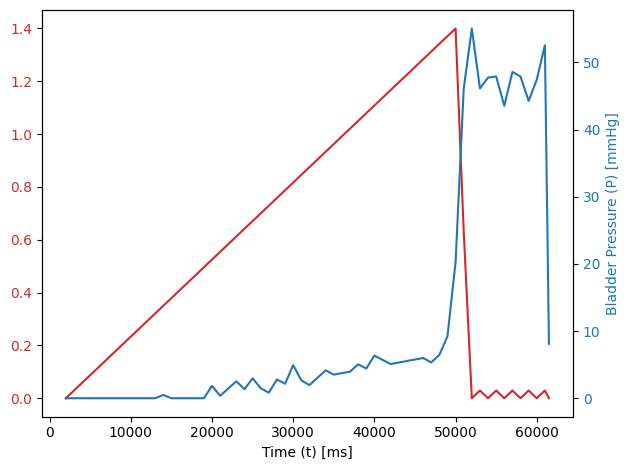

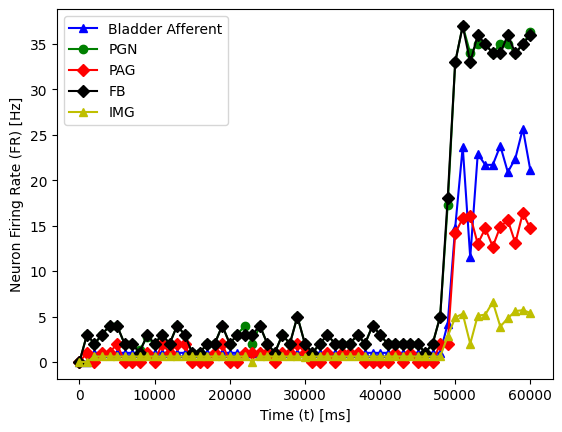

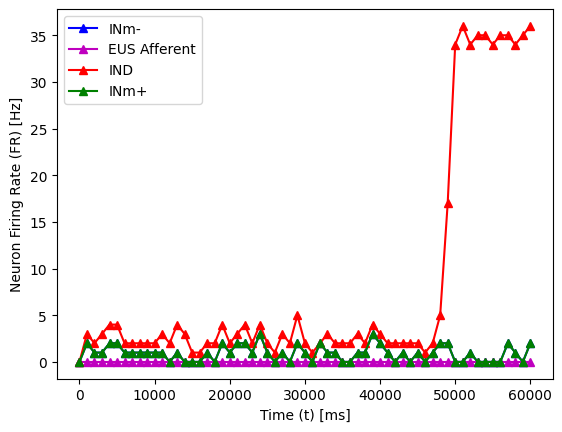

In [5]:
import os, sys, logging, faulthandler
from bmtk.simulator import bionet
from bmtk.simulator.bionet.default_setters.cell_models import loadHOC
from bmtk.simulator.bionet.modules.sim_module import SimulatorMod
from bmtk.utils.reports.spike_trains import SpikeTrains
from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator
from bmtk.simulator.bionet.io_tools import io
import numpy as np
from neuron import h
import pandas as pd
# from bmtk.analyzer.cell_vars import plot_report
from feedback_loop import FeedbackLoop
from plotting import plot_figure, plotting_calculator
# Import the synaptic depression/facilitation model
import synapses

import plot_results


"""
Basic Logging features, disable faulthandler if you don't want stacktraces printed
logging determines the level and file to save logs to (might be worth moving location)
"""
faulthandler.enable()
logging.basicConfig(filename='error_logs/debug_run.log', level=logging.DEBUG)

synapses.load()
logging.info('Synapses Loaded')

press_thres = 17 # cm H20 #40
                 # Lingala, et al. 2016
change_thres = 10 # cm H20 #10
                 # Need biological value for this

bionet.pyfunction_cache.add_cell_model(loadHOC, directive='hoc', model_type='biophysical')
logging.info('Cell model added')

def run(config_file):

    conf = bionet.Config.from_json(config_file, validate=True)
    conf.build_env()

    fbmod = FeedbackLoop()

    graph = bionet.BioNetwork.from_config(conf)
    sim = bionet.BioSimulator.from_config(conf, network=graph)
    sim.add_mod(fbmod)  # Attach the above module to the simulator.
    sim.run()

    #fbmod.save_aff(conf.output_dir)
    plot_results.run(sim=sim,conf=conf)

# if __name__ == '__main__':
#     if __file__ != sys.argv[-1]:
#         run(sys.argv[-1])
#     else:
#         run('config.json')

run(config_file='jsons/simulation_config.json')